
*   By **Khashayar Mohamadi**
*   Linkdin : [@khashayar-mohammadi](https://www.linkedin.com/in/khashayar-mohamadi-3850b627a?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BuMGk98fFRtSG%2B5GNZDpHKA%3D%3D)
*   Github :   [@khashayarM7](https://github.com/khashayarM7)

# **Dataset Description:**
The dataset used in this project is the TMDB (The Movie Database) movie dataset, which contains information about 5,000 movies. The dataset includes various features such as:
**Movie Title:** The original title of the movie.

**Release Year:** The year the movie was released.

**Release Month:**The month the movie was released.

**Runtime:** The duration of the movie in minutes.

**Budget:**The production budget of the movie.

**Revenue:** The total revenue generated by the movie.

**Profit:** The difference between the revenue and the budget.

**Popularity:** A metric that indicates the popularity of the movie.

**Vote Average:** The average user rating for the movie.

**Vote Count:** The number of votes the movie has received.

**Genres:** The genres associated with the movie.

**Keywords:** Keywords related to the movie's plot and themes.

**Cast:** The main actors in the movie.

**Crew:** The key crew members involved in the production, such as the director,
writer, and producer.

**Production Companies:** The companies involved in the production of the movie.

**Production Countries:** The countries where the movie was produced.

**Spoken Languages:** The languages spoken in the movie.

This dataset provides a comprehensive view of the movie industry, covering various aspects of film production, release, and performance.

# **Load libraries.**

**Loading libraries and data:**
 The code starts by importing the necessary libraries, including NumPy, Pandas, Seaborn, Matplotlib, and others. It then loads the two CSV files, tmdb_5000_credits.csv and tmdb_5000_movies.csv, into Pandas DataFrames named credit and movies, respectively.
Analysis: The initial data loading and preprocessing steps are crucial for setting up the project. Importing the relevant libraries ensures the availability of necessary tools for data manipulation, visualization, and analysis. Loading the CSV files into Pandas DataFrames provides a structured way to work with the data.

In [ ]:
import time
print("Load libraries ... ", end= '')
t0 = time.time()
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from collections import Counter
import warnings
from functools import partial
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
warnings.filterwarnings("ignore")
print('Done. in', round(time.time()-t0,3), 'Seconds')

Load libraries ... Done. in 0.001 Seconds


# **Load Dataset**

In [ ]:
print('Loading data ... ', end= '')
t0 = time.time()

credit = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')
print('Done. in', round(time.time()-t0,3), '')

Loading data ... Done. in 0.55 


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# **Merging the DataFrames:**
 The code then merges the credit and movies DataFrames based on the 'id' column, creating a new DataFrame called df. This combined DataFrame includes information from both the original files.
Analysis: Merging the two DataFrames is an important step to create a comprehensive dataset that includes all the relevant information about the movies. By joining the data on the 'id' column, the code ensures that the information from the two sources is properly linked and can be analyzed together.

In [ ]:
credit.columns = ['id', 'title', 'cast', 'crew']
df = movies.merge(credit, on = 'id')
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title_x                 4800
vote_average              71
vote_count              1609
title_y                 4800
cast                    4761
crew                    4776
dtype: int64

# **Handling missing values and data types:**
Description: The code then checks the information about the df DataFrame, including data types and missing values. It identifies the columns with missing values and uses various techniques to handle them, such as filling missing values with the mode of the column.
Analysis: Addressing missing values is a crucial step in data preprocessing. The code's approach of identifying and handling missing values ensures the dataset is clean and ready for further analysis. Maintaining data integrity is essential for obtaining accurate and reliable results.

In [ ]:
missing_values = df.isnull().sum()

print("Missing values: ")
print(missing_values)

Missing values: 
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


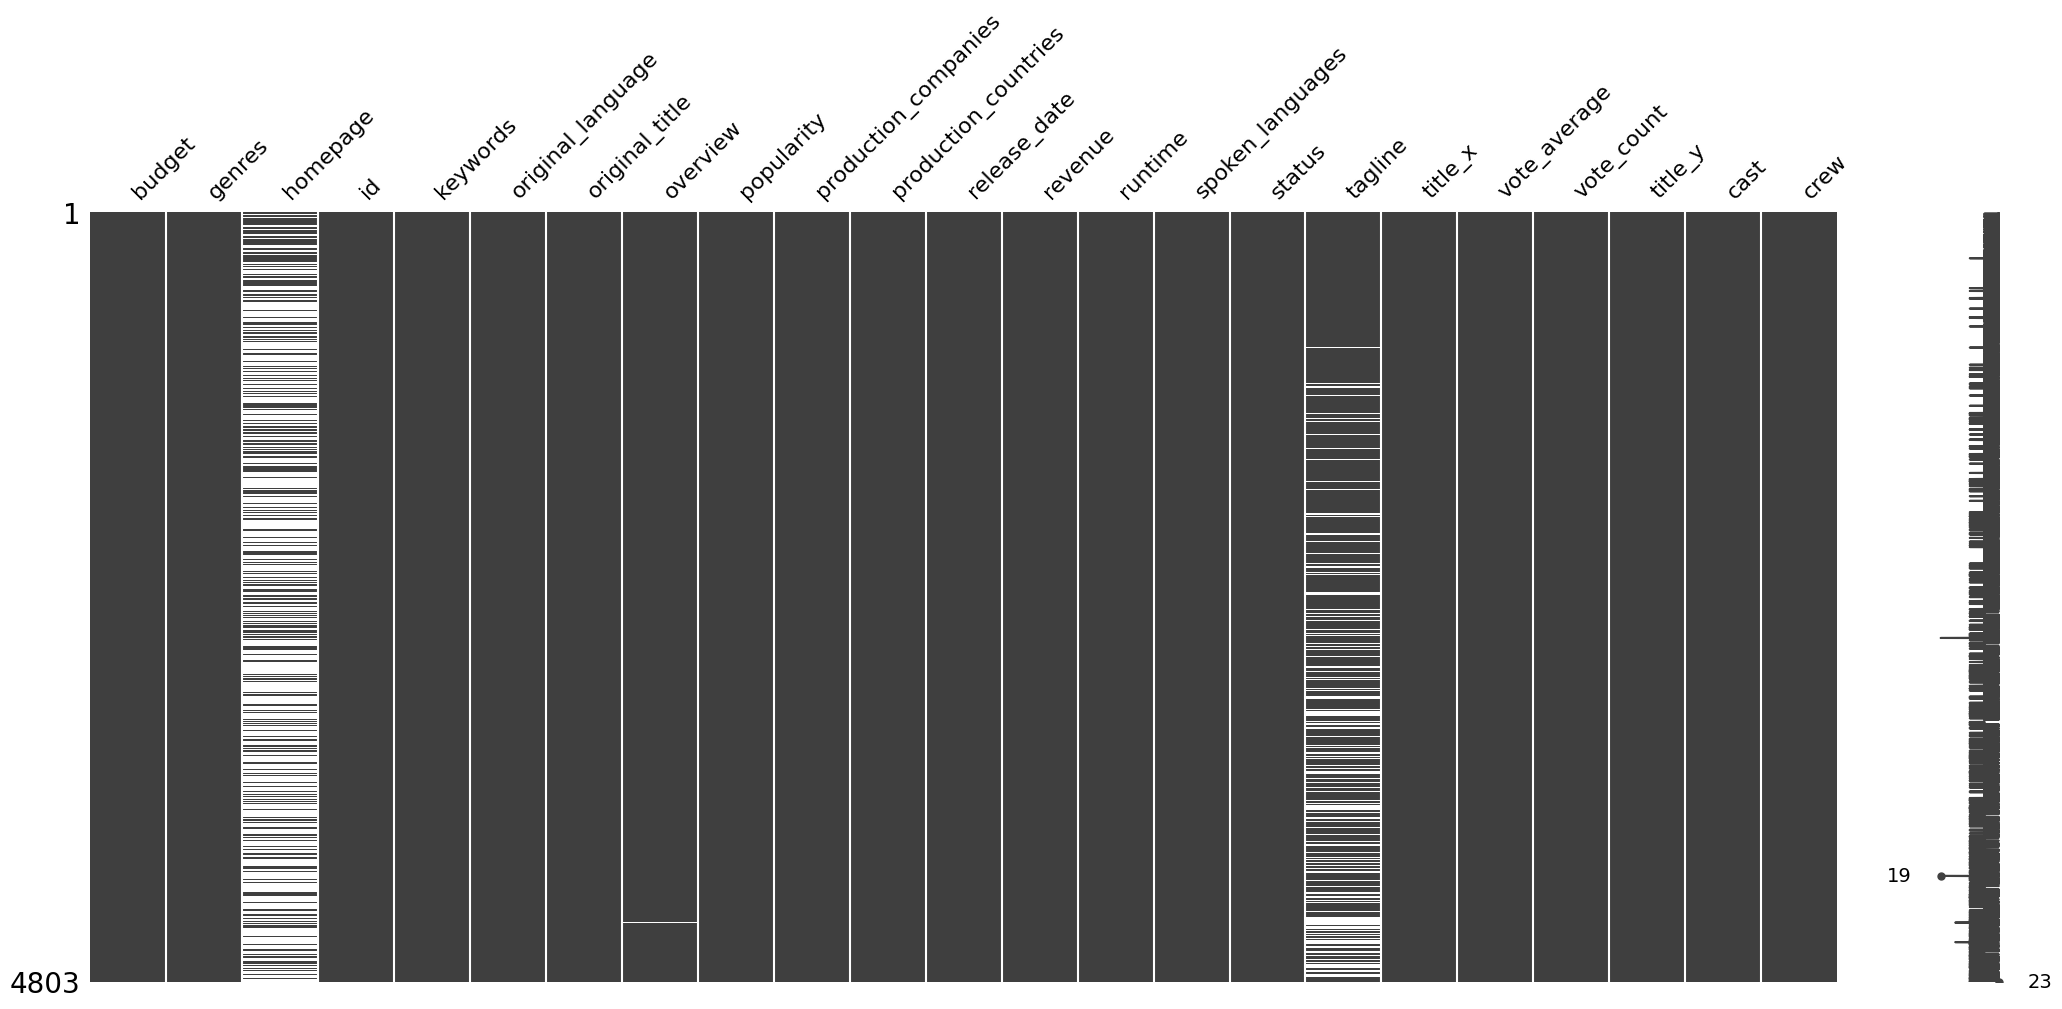

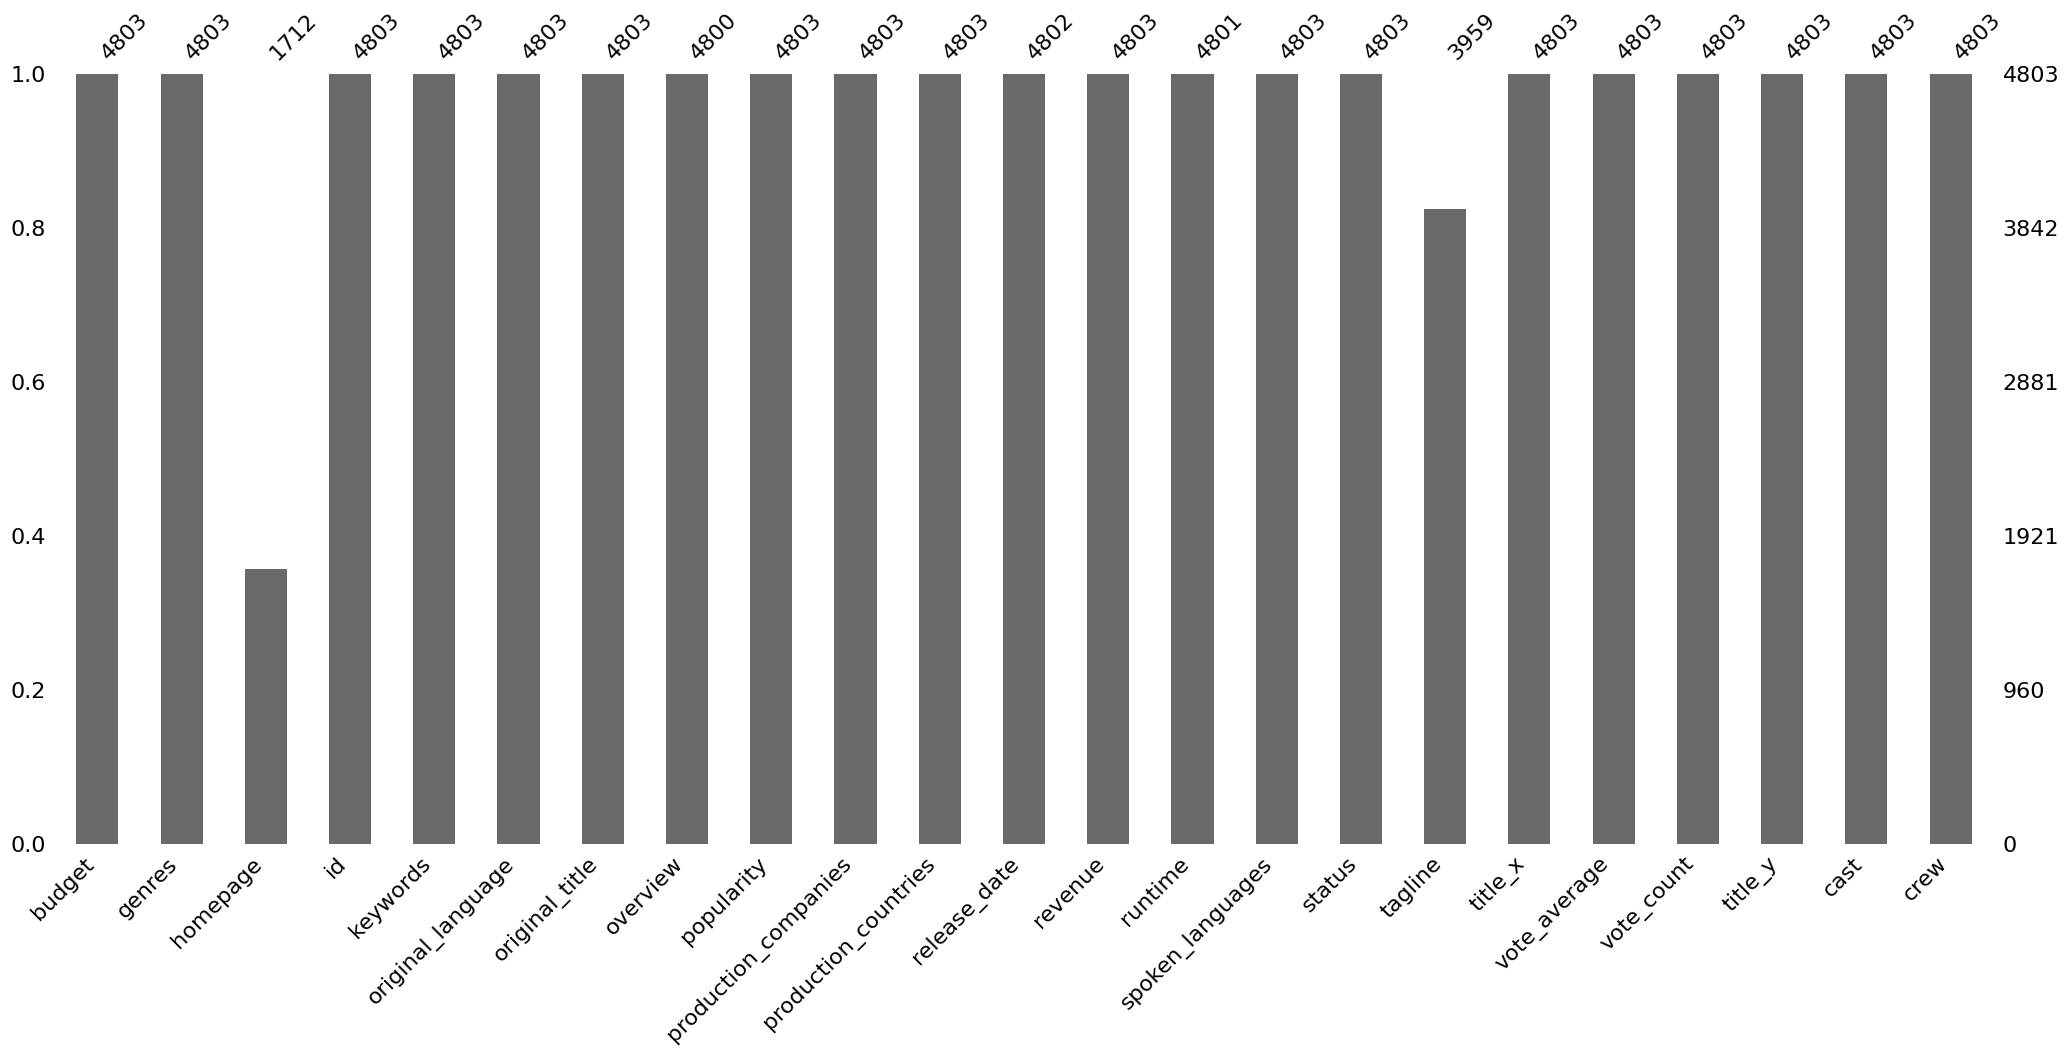

In [ ]:
msn.matrix(df)
plt.show()

msn.bar(df)
plt.show()


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4803, dtype: bool

# **Transforming column data:**
Description: The code then converts the 'release_date' column to a datetime format and extracts the year and month of release as new columns. It also processes the 'cast', 'crew', 'genres', 'keywords', 'production_countries', 'production_companies', and 'spoken_languages' columns by converting them from JSON format to lists.
Analysis: Transforming the data into a more usable format is an important step. Extracting specific information, such as release year and month, can provide valuable insights during the analysis. Converting the JSON-formatted columns to lists makes it easier to work with and extract relevant information from these complex data structures.

**Creating new features:**
Description: The code then creates a new 'director', 'writer', and 'producer' column by extracting the corresponding information from the 'crew' column. It also calculates the 'profit' column by subtracting the 'budget' from the 'revenue'.
Analysis: Creating new features from the existing data can provide additional insights and potentially improve the performance of any models or analyses. Extracting the director, writer, and producer information, as well as calculating the profit, are examples of feature engineering that can be useful for further exploration and analysis.

In [ ]:
# convert date appropriate format
df["release_date"] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month_name()
del df["release_date"]
json_columns = {'cast', 'crew', 'genres', 'keywords', 'production_countries',
                'production_companies', 'spoken_languages'}

for c in json_columns:
    df[c] = df[c].apply(json.loads)
    if c != "crew": # We need other information besides the name
        df[c] = df[c].apply(lambda row: [x["name"] for x in row])


def get_job(job, row):
    person_name = [x['name'] for x in row if x['job']==job]
    return person_name[0] if len(person_name) else np.nan

df["director"] = df["crew"].apply(partial(get_job, "Director"))
df["writer"]   = df["crew"].apply(partial(get_job, "Writer"))
df["producer"] = df["crew"].apply(partial(get_job, "Producer"))
del df["crew"]

# create profit column
df["profit"] = df["revenue"] - df["budget"]

In [ ]:
df.head()

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... vote_average  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...          7.2   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...          6.9   
2                   [Columbia Pictures, Danjaq, B24]  ...          6.3   
3  [Legendary Pictures, Warner Bros., DC Entertai...  ...          7.6   
4                             [Walt Disney Pictures]  ...          6.1   

   vote_count                                   title_y  \
0       11800                                    Avatar   
1        4500  Pirates of the Caribbean: At World's End   
2        4466                                   Spectre   
3        9106                     The Dark Knight Rises   
4        2124                               John Carter   

                                                cast release_year  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weave...       2009.0   
1  [Johnny Depp, Orlando Bloom, Keira Knightley, ...       2007.0   
2  [Daniel Craig, Christoph Waltz, Léa Seydoux, R...       2015.0   
3  [Christian Bale, Michael Caine, Gary Oldman, A...       2012.0   
4  [Taylor Kitsch, Lynn Collins, Samantha Morton,...       2012.0   

  release_month           director         writer           producer  \
0      December      James Cameron  James Cameron      James Cameron   
1           May     Gore Verbinski            NaN  Jerry Bruckheimer   
2       October         Sam Mendes            NaN   Barbara Broccoli   
3          July  Christopher Nolan            NaN      Charles Roven   
4         March     Andrew Stanton            NaN       Colin Wilson   

       profit  
0  2550965087  
1   661000000  
2   635674609  
3   834939099  
4    24139100  

[5 rows x 27 columns]

In [ ]:
df.drop(columns = ['homepage', 'title_x', 'title_y', 'id'], inplace= True)
df.isna().sum()

budget                     0
genres                     0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
cast                       0
release_year               1
release_month              1
director                  30
writer                  3252
producer                1023
profit                     0
dtype: int64

In [ ]:
for col in ["runtime", "release_year", "release_month"]:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

df.isna().sum()

budget                     0
genres                     0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
cast                       0
release_year               0
release_month              0
director                  30
writer                  3252
producer                1023
profit                     0
dtype: int64

In [ ]:
df.describe()

budget   popularity       revenue      runtime  vote_average  \
count  4.803000e+03  4803.000000  4.803000e+03  4803.000000   4803.000000   
mean   2.904504e+07    21.492301  8.226064e+07   106.868832      6.092172   
std    4.072239e+07    31.816650  1.628571e+08    22.609847      1.194612   
min    0.000000e+00     0.000000  0.000000e+00     0.000000      0.000000   
25%    7.900000e+05     4.668070  0.000000e+00    94.000000      5.600000   
50%    1.500000e+07    12.921594  1.917000e+07   103.000000      6.200000   
75%    4.000000e+07    28.313505  9.291719e+07   117.500000      6.800000   
max    3.800000e+08   875.581305  2.787965e+09   338.000000     10.000000   

         vote_count  release_year        profit  
count   4803.000000   4803.000000  4.803000e+03  
mean     690.217989   2002.470123  5.321560e+07  
std     1234.585891     12.413419  1.359677e+08  
min        0.000000   1916.000000 -1.657101e+08  
25%       54.000000   1999.000000 -7.995375e+05  
50%      235.000000   2005.000000  2.511317e+06  
75%      737.000000   2011.000000  5.531286e+07  
max    13752.000000   2017.000000  2.550965e+09

In [ ]:
df.head(5)

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [Ingenious Film Partners, Twentieth Century Fo...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...   
2                   [Columbia Pictures, Danjaq, B24]   
3  [Legendary Pictures, Warner Bros., DC Entertai...   
4                             [Walt Disney Pictures]   

                         production_countries     revenue  ...  \
0  [United States of America, United Kingdom]  2787965087  ...   
1                  [United States of America]   961000000  ...   
2  [United Kingdom, United States of America]   880674609  ...   
3                  [United States of America]  1084939099  ...   
4                  [United States of America]   284139100  ...   

                                          tagline vote_average vote_count  \
0                     Enter the World of Pandora.          7.2      11800   
1  At the end of the world, the adventure begins.          6.9       4500   
2                           A Plan No One Escapes          6.3       4466   
3                                 The Legend Ends          7.6       9106   
4            Lost in our world, found in another.          6.1       2124   

                                                cast  release_year  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weave...        2009.0   
1  [Johnny Depp, Orlando Bloom, Keira Knightley, ...        2007.0   
2  [Daniel Craig, Christoph Waltz, Léa Seydoux, R...        2015.0   
3  [Christian Bale, Michael Caine, Gary Oldman, A...        2012.0   
4  [Taylor Kitsch, Lynn Collins, Samantha Morton,...        2012.0   

   release_month           director         writer           producer  \
0       December      James Cameron  James Cameron      James Cameron   
1            May     Gore Verbinski            NaN  Jerry Bruckheimer   
2        October         Sam Mendes            NaN   Barbara Broccoli   
3           July  Christopher Nolan            NaN      Charles Roven   
4          March     Andrew Stanton            NaN       Colin Wilson   

       profit  
0  2550965087  
1   661000000  
2   635674609  
3   834939099  
4    24139100  

[5 rows x 23 columns]

# **Exploratory Data Analysis (EDA):**
Description: The code includes several functions to visualize the top movies based on different metrics, such as revenue, budget, profit, vote average, vote count, and popularity. These visualizations provide insights into the distribution and trends of these movie attributes.
**Analysis:** The EDA phase is crucial for understanding the dataset and identifying potential patterns or trends. By visualizing the top movies based on various metrics, the code enables the identification of movies that stand out in terms of different performance indicators. This information can be used to draw conclusions about the movie industry and consumer preferences.

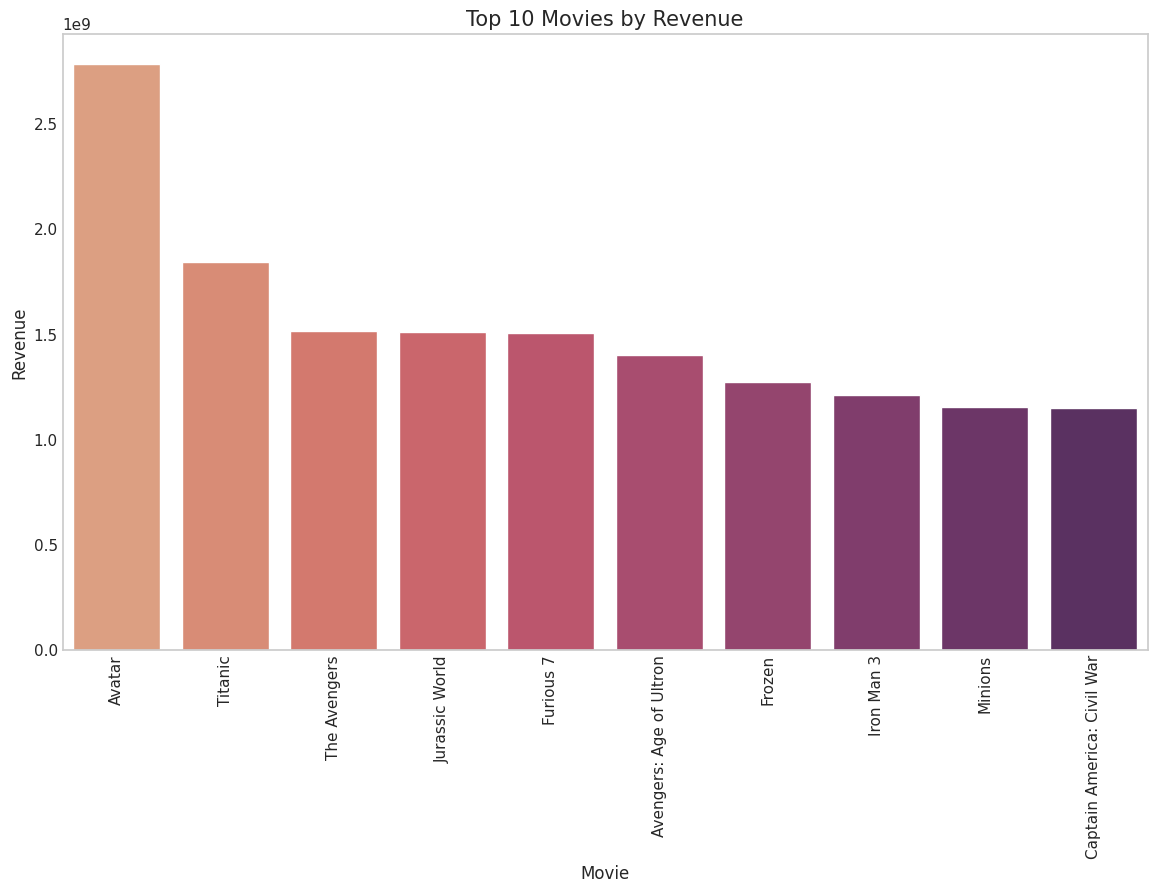

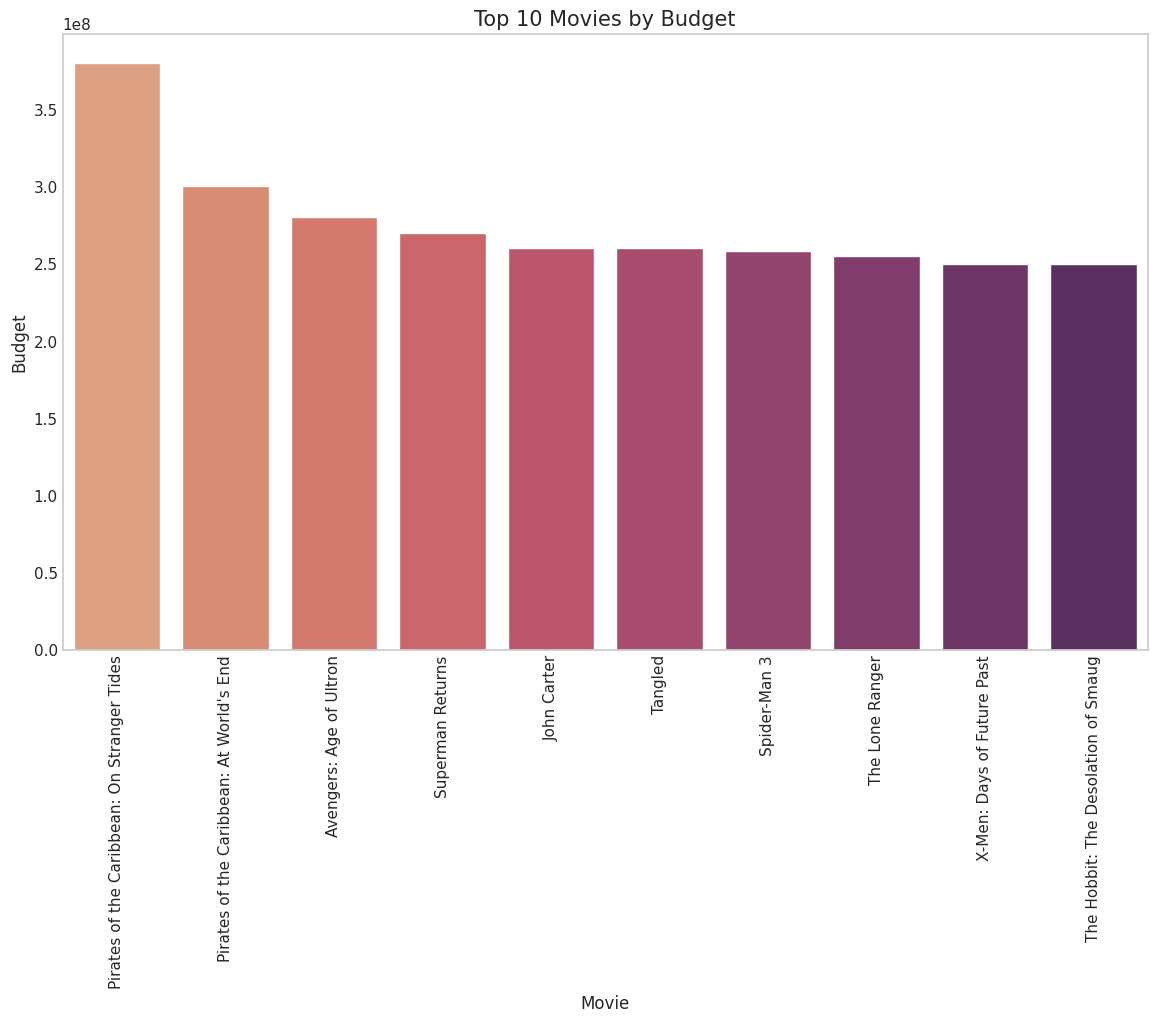

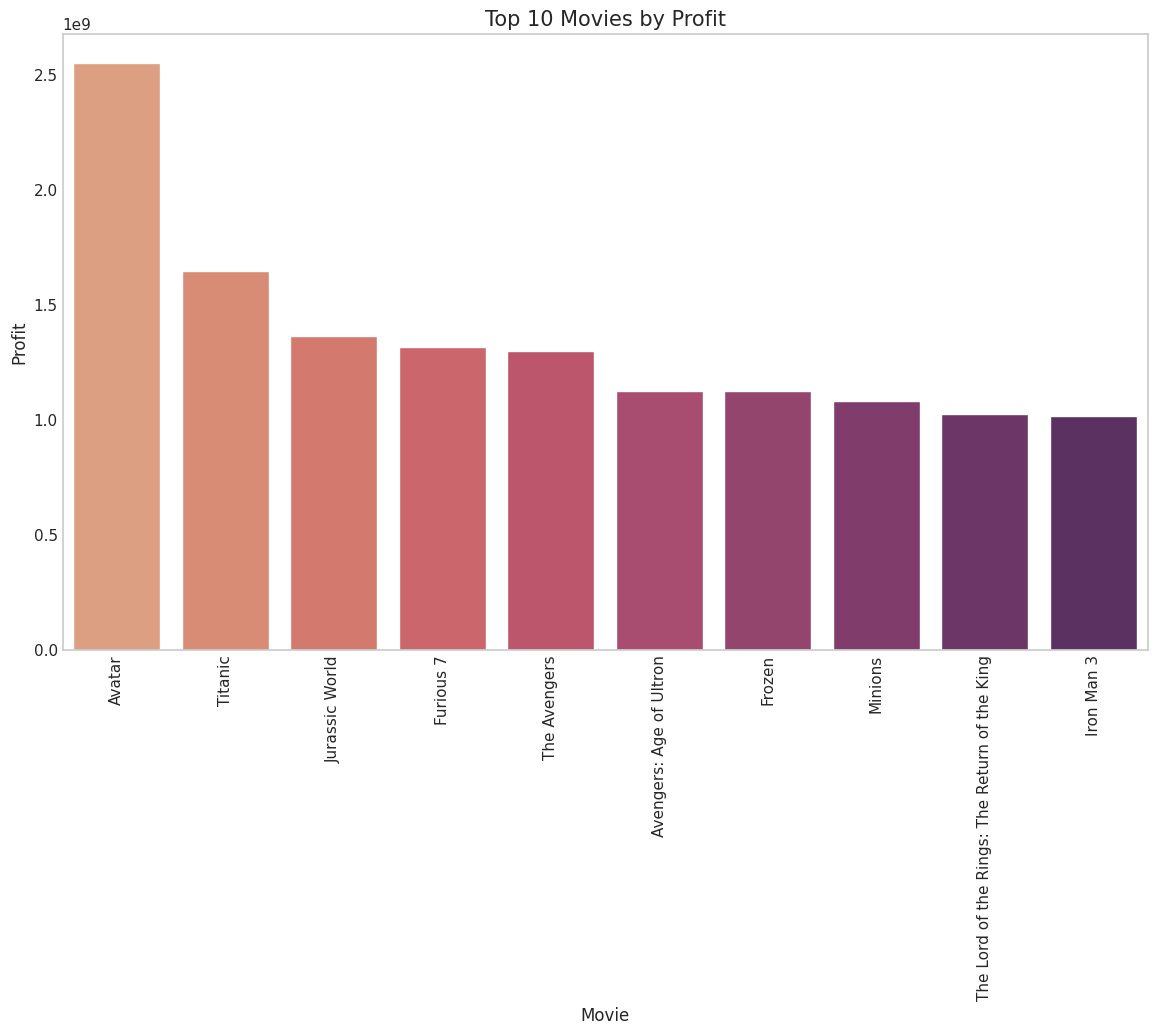

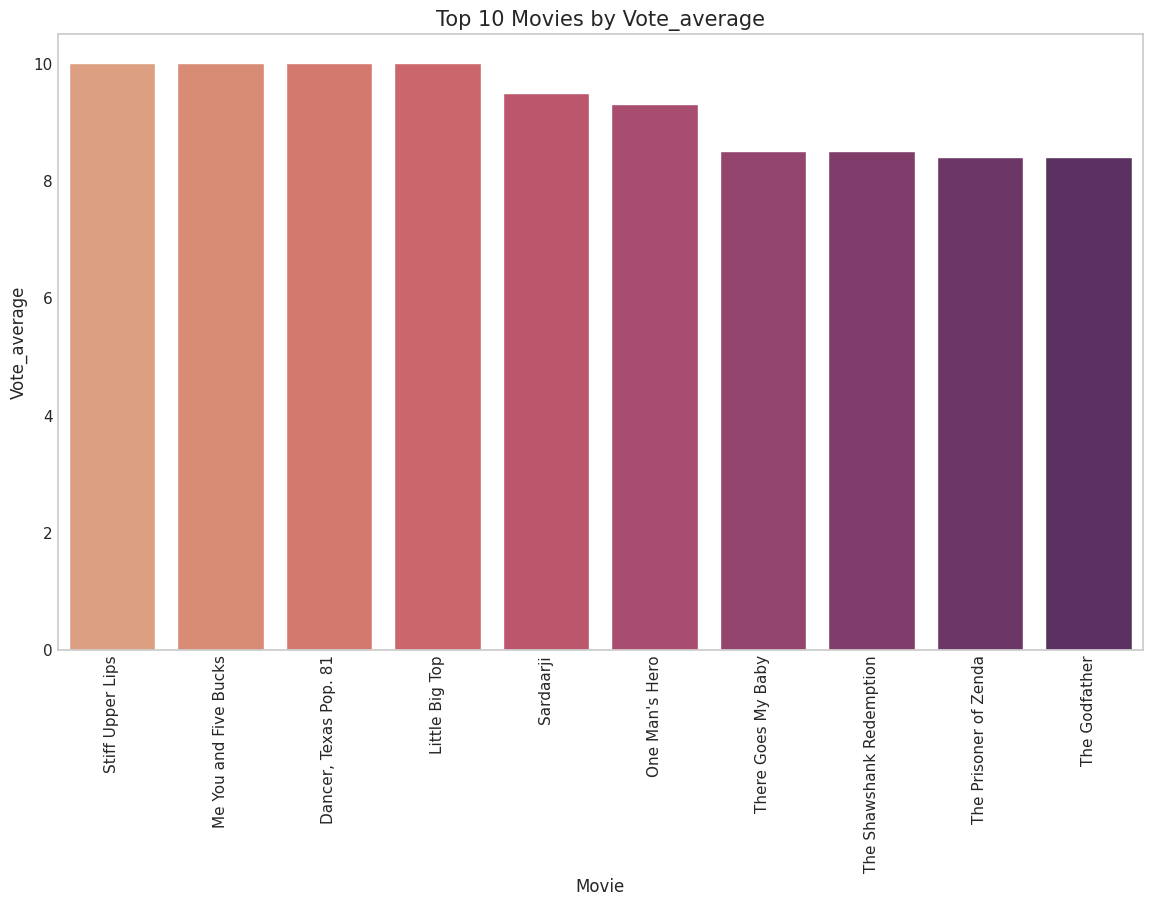

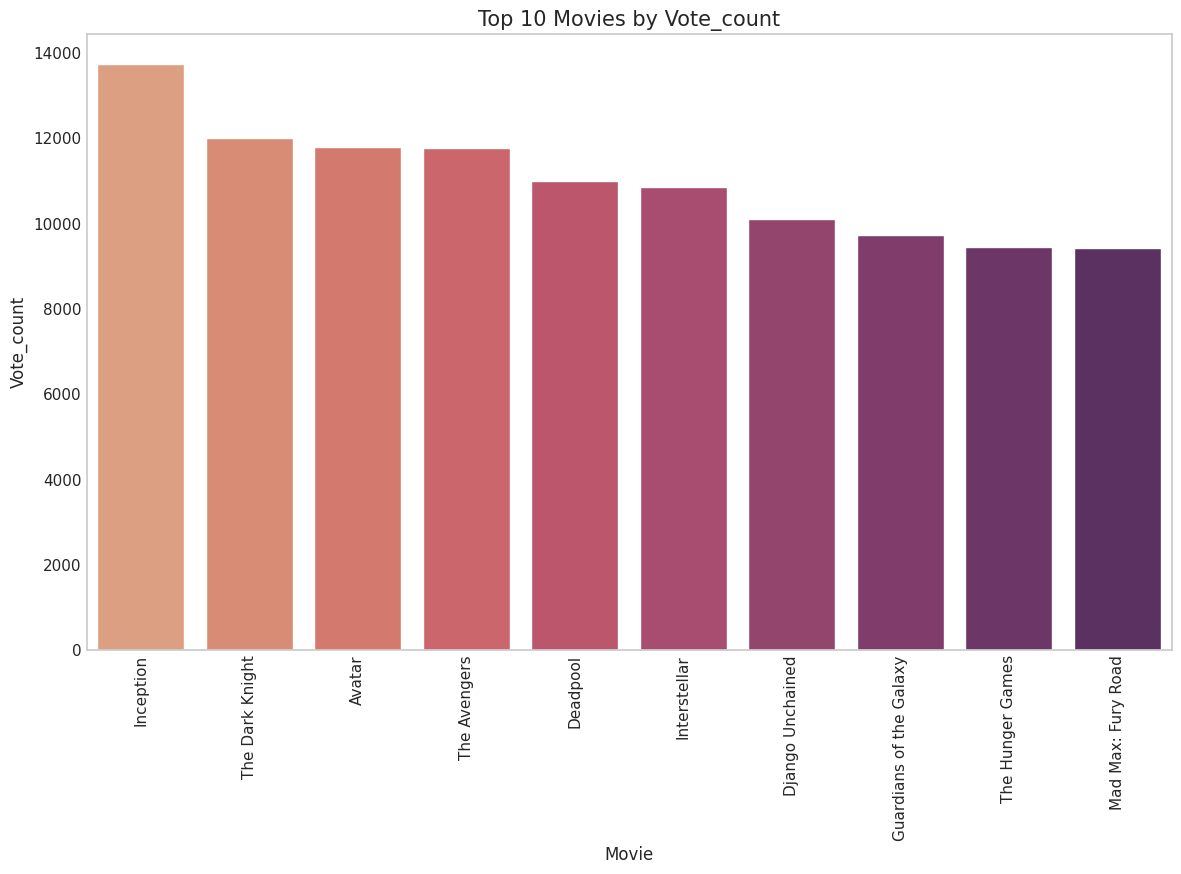

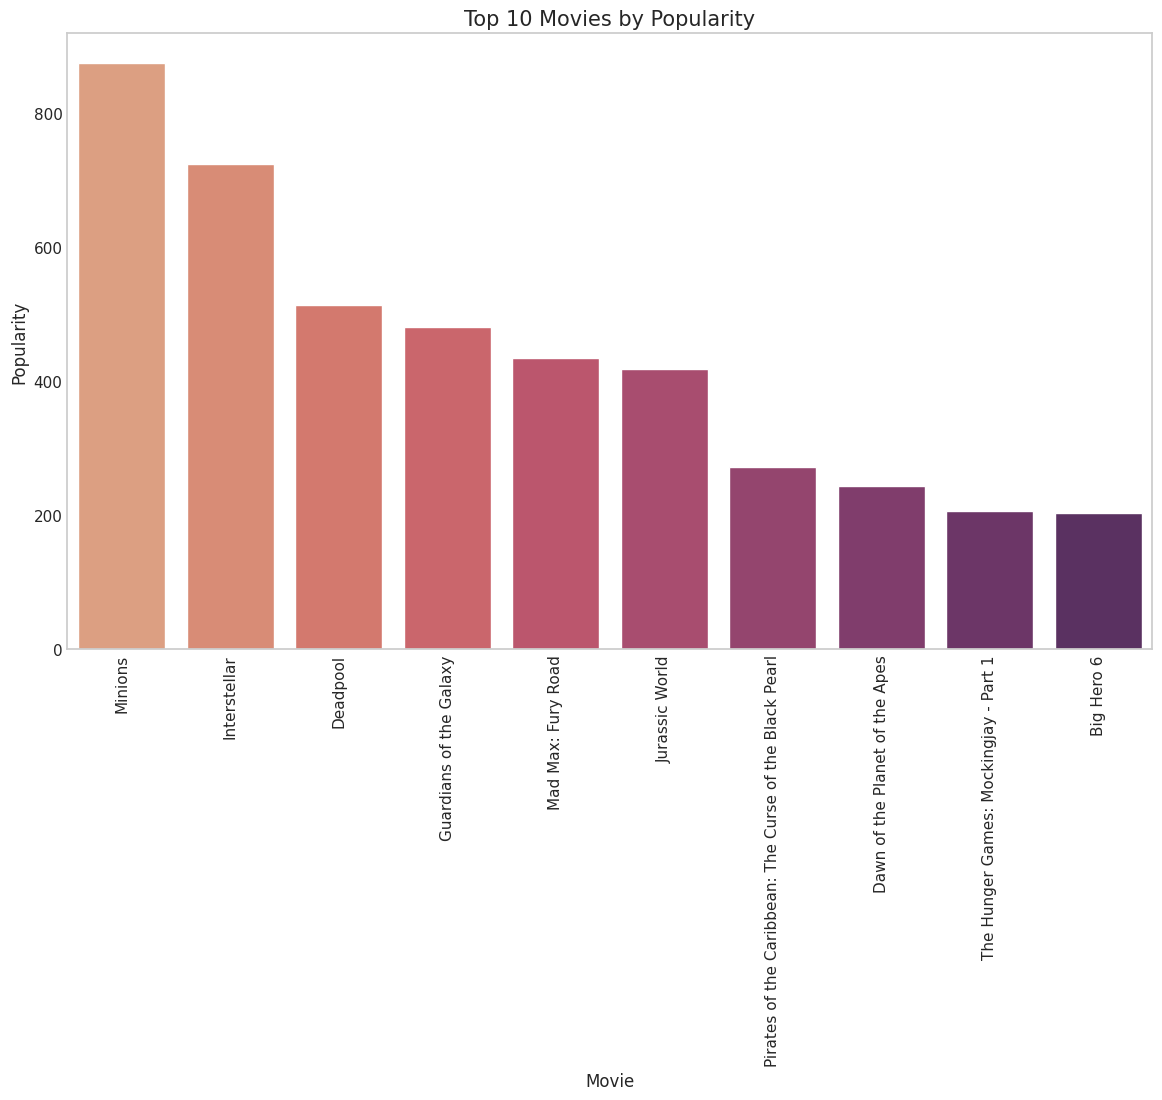

In [ ]:
def plot_top_movies(df, metric, n=10):
    """
    Plot the top n movies based on the specified metric.

    Parameters:
        df (DataFrame): The DataFrame containing movie data.
        metric (str): The metric to use for ranking (e.g., 'revenue', 'budget', 'profit', 'vote_average', 'vote_count', 'popularity').
        n (int): The number of top movies to plot.
    """
    top_movies = df.sort_values(by=metric, ascending=False)[['original_title', metric]][:n]

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    sns.barplot(x='original_title', y=metric, data=top_movies, palette="flare")
    plt.title(f'Top {n} Movies by {metric.capitalize()}', fontsize=15)
    plt.xlabel('Movie', fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.xticks(rotation=90)
    plt.tick_params(length=0)
    plt.grid(False)
    plt.show()

# Plot top movies by different metrics
plot_top_movies(df, 'revenue')
plot_top_movies(df, 'budget')
plot_top_movies(df, 'profit')
plot_top_movies(df, 'vote_average')
plot_top_movies(df, 'vote_count')
plot_top_movies(df, 'popularity')

# **Time-based Analysis:**
Description: The code includes a plot_top_movies_by_time function that allows the user to plot the top movies based on a specific metric within a given time frame. This function is used to explore the top movies by popularity from 2000 to the current year, as well as from 1980 to 2000.
Analysis: Analyzing the top movies over time can reveal how the industry and audience preferences have evolved. The time-based analysis provides insights into the changing landscape of the movie industry, potentially highlighting factors such as technological advancements, shifting social and political contexts, generational shifts, critical acclaim, marketing strategies, and the role of nostalgia in shaping movie popularity.

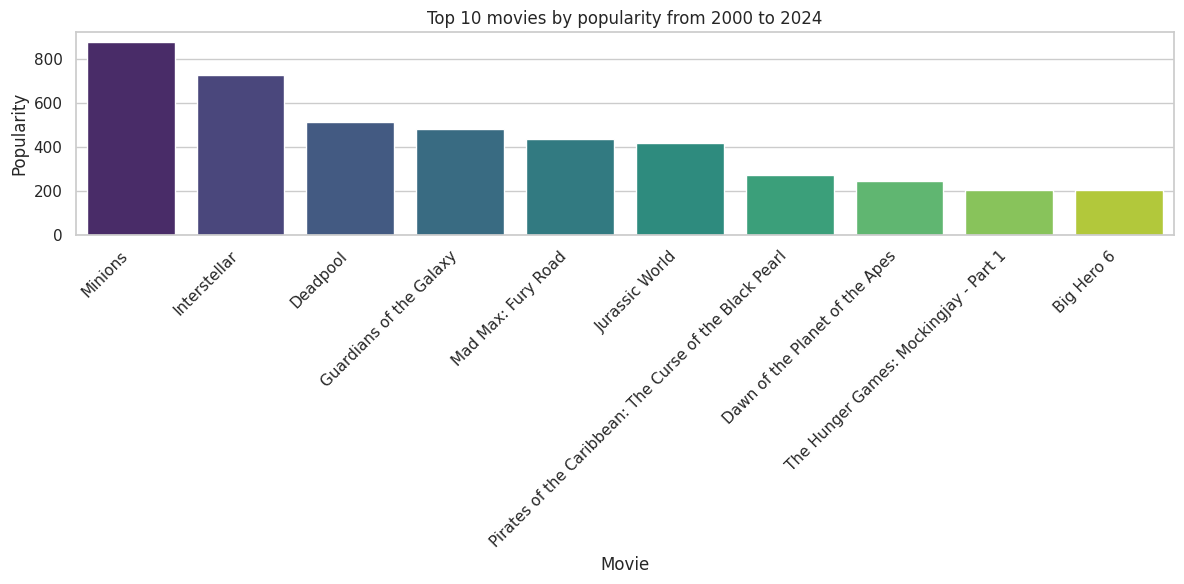

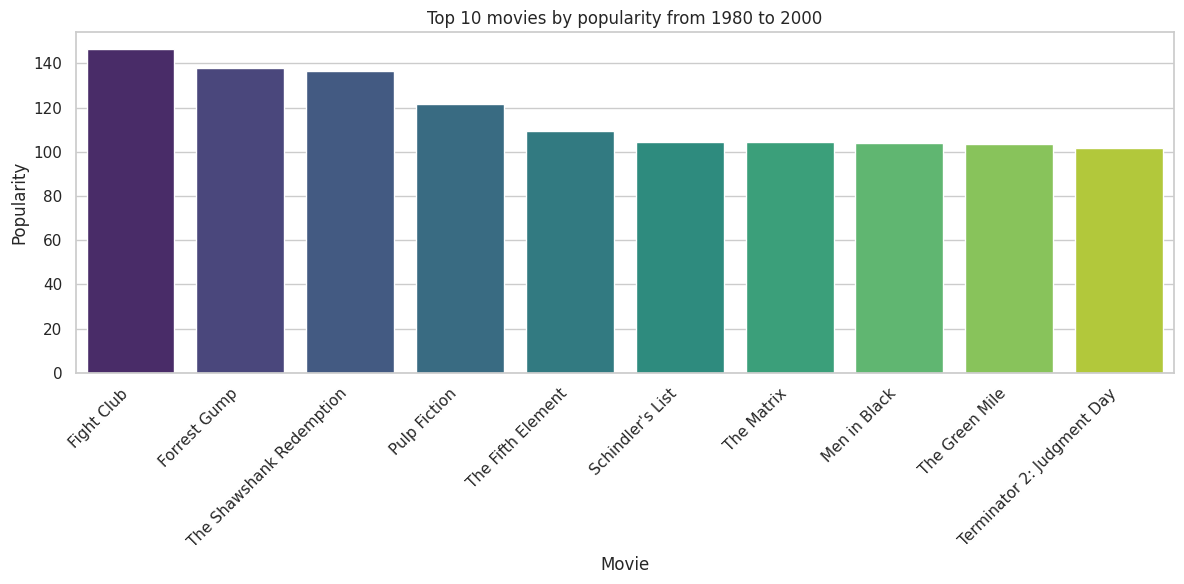

In [ ]:
def plot_top_movies_by_time(df, metric, start_year, end_year, n=10):
    """
    Plot the top n movies based on the specified metric within a specific time frame.

    Parameters:
        df (DataFrame): The DataFrame containing movie data.
        metric (str): The metric to use for ranking (e.g., 'popularity', 'revenue', 'budget', etc.).
        start_year (int): The start year defining the time frame.
        end_year (int): The end year defining the time frame.
        n (int): The number of top movies to plot.
    """
    # Filter movies within the specified time frame
    filtered_df = df[(df['release_year'] >= start_year) & (df['release_year'] <= end_year)]

    # Find the top n movies based on the specified metric
    top_movies = filtered_df.sort_values(by=metric, ascending=False)[['original_title', metric]][:n]

    # Plot the top movies
    plt.figure(figsize=(12, 6))
    sns.barplot(x='original_title', y=metric, data=top_movies, palette="viridis")
    plt.title(f"Top {n} movies by {metric} from {start_year} to {end_year}")
    plt.xlabel("Movie")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_top_movies_by_time(df, 'popularity', start_year=2000, end_year=pd.Timestamp.now().year, n=10)
plot_top_movies_by_time(df, 'popularity', start_year=1980, end_year=2000, n=10)

resons: The late 1990s and early 2000s saw a surge in superhero movies, which might explain their potential absence from the 1980s-2000 list.
Technological Advancements: CGI advancements allow for more visually stunning experiences, but the importance of compelling stories remains.
Shifting Audience Preferences: Audience tastes and what resonates culturally can evolve over time. Social and political issues might have become more prominent themes in recent films.
Social and Political Context: As societies evolve, so do their priorities and concerns. Movies can act as a mirror reflecting these changes.  Increased awareness of social justice issues might lead to a demand for stories that address them, while a changing political climate might spark movies with more overt commentary.

Technological Advancements: Special effects advancements allow for visually stunning experiences, like superhero movies, which might attract a broader audience. Streaming services create a demand for more content and diverse genres, catering to various preferences.

Generational Shifts: Younger generations might have different expectations and experiences than older ones. What resonated with your parents might not hold the same appeal for you.

Critical Acclaim and Awards: Films praised by critics or winning awards can generate interest and influence popularity. Awards recognition can be seen as a mark of quality, attracting viewers.

Marketing and Word-of-Mouth:  Effective marketing campaigns and audience buzz can significantly influence what movies people are interested in seeing. Social media allows for faster and wider word-of-mouth spread, shaping popularity.

Nostalgia: Remakes and reboots of older franchises tap into a sense of familiarity and nostalgia, attracting audiences who grew up with these stories.



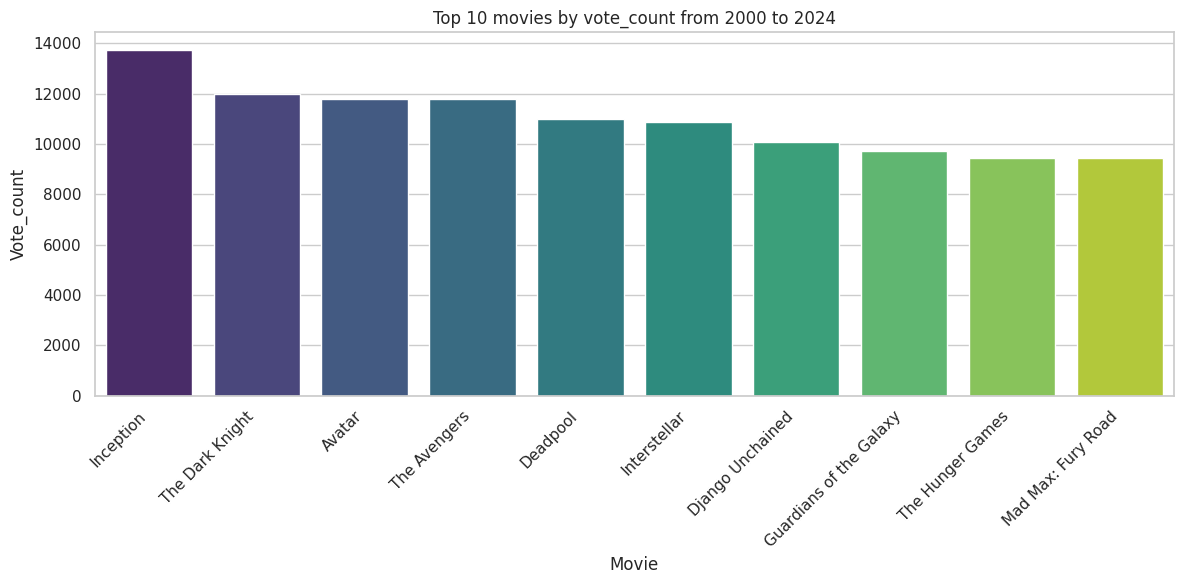

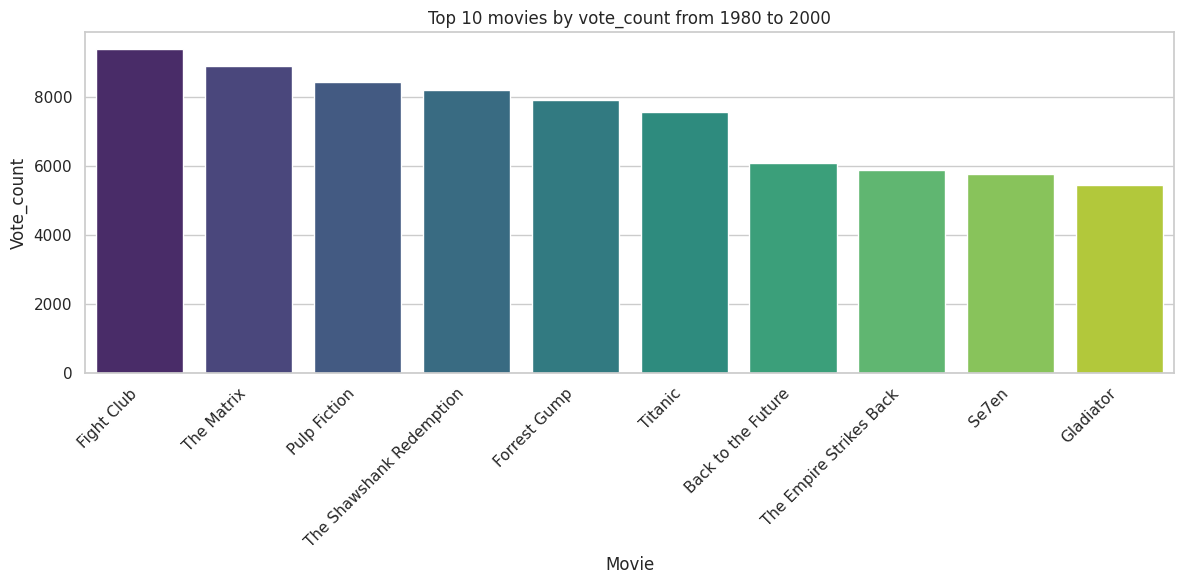

In [ ]:
def plot_top_movies_by_time(df, metric, start_year, end_year, n=10):
    """
    Plot the top n movies based on the specified metric within a specific time frame.

    Parameters:
        df (DataFrame): The DataFrame containing movie data.
        metric (str): The metric to use for ranking (e.g., 'popularity', 'revenue', 'budget', etc.).
        start_year (int): The start year defining the time frame.
        end_year (int): The end year defining the time frame.
        n (int): The number of top movies to plot.
    """
    # Filter movies within the specified time frame
    filtered_df = df[(df['release_year'] >= start_year) & (df['release_year'] <= end_year)]

    # Find the top n movies based on the specified metric
    top_movies = filtered_df.sort_values(by=metric, ascending=False)[['original_title', metric]][:n]

    # Plot the top movies
    plt.figure(figsize=(12, 6))
    sns.barplot(x='original_title', y=metric, data=top_movies, palette="viridis")
    plt.title(f"Top {n} movies by {metric} from {start_year} to {end_year}")
    plt.xlabel("Movie")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_top_movies_by_time(df, 'vote_count', start_year=2000, end_year=pd.Timestamp.now().year, n=10)
plot_top_movies_by_time(df, 'vote_count', start_year=1980, end_year=2000, n=10)

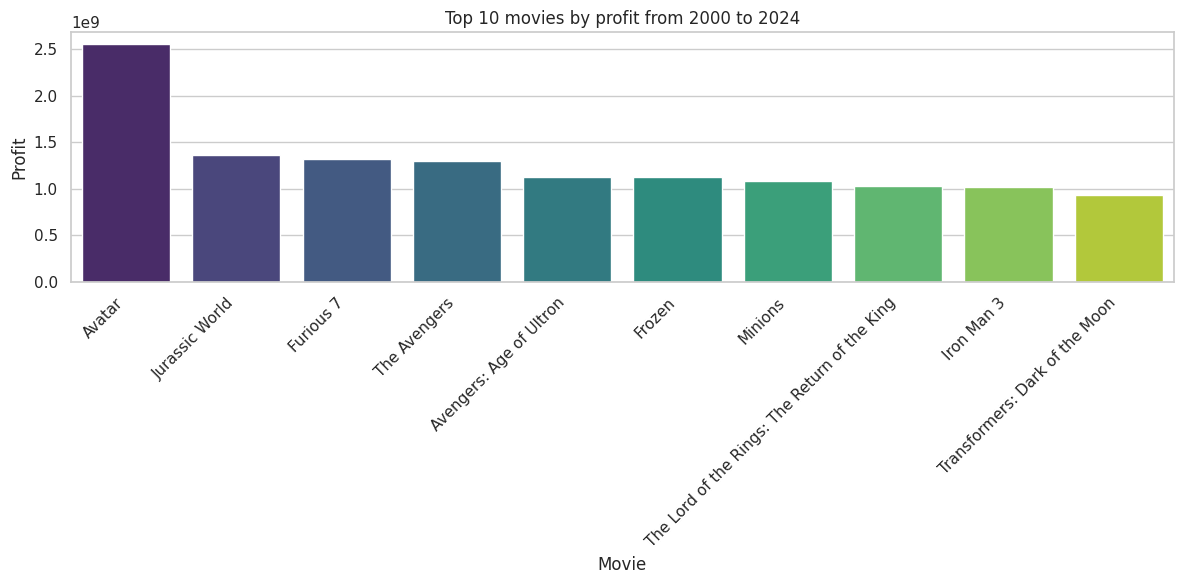

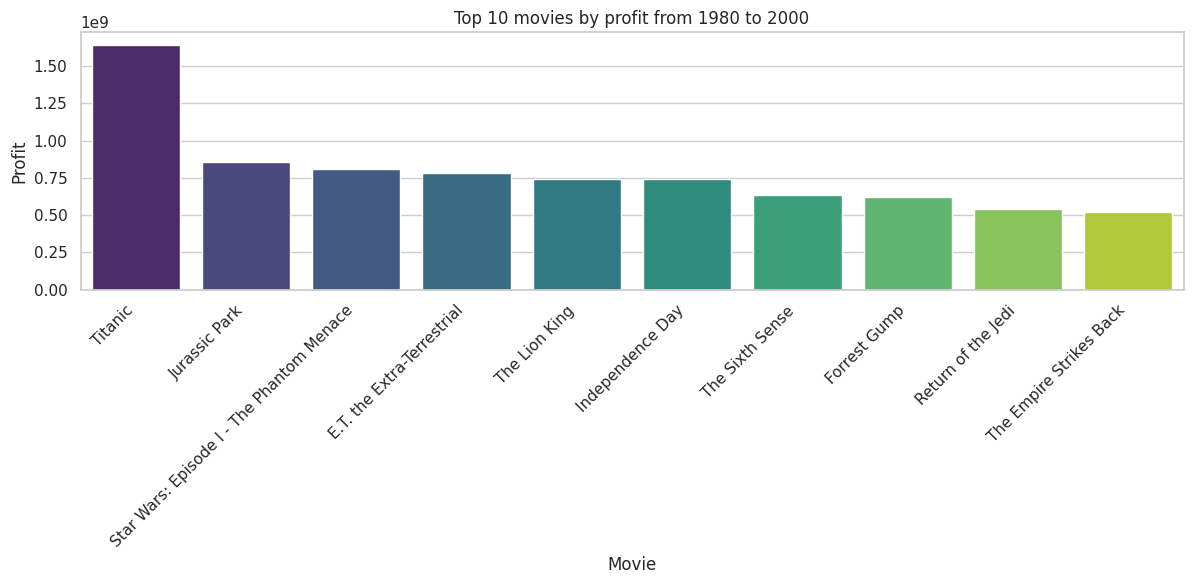

In [ ]:
def plot_top_movies_by_time(df, metric, start_year, end_year, n=10):
    """
    Plot the top n movies based on the specified metric within a specific time frame.

    Parameters:
        df (DataFrame): The DataFrame containing movie data.
        metric (str): The metric to use for ranking (e.g., 'popularity', 'revenue', 'budget', etc.).
        start_year (int): The start year defining the time frame.
        end_year (int): The end year defining the time frame.
        n (int): The number of top movies to plot.
    """
    # Filter movies within the specified time frame
    filtered_df = df[(df['release_year'] >= start_year) & (df['release_year'] <= end_year)]

    # Find the top n movies based on the specified metric
    top_movies = filtered_df.sort_values(by=metric, ascending=False)[['original_title', metric]][:n]

    # Plot the top movies
    plt.figure(figsize=(12, 6))
    sns.barplot(x='original_title', y=metric, data=top_movies, palette="viridis")
    plt.title(f"Top {n} movies by {metric} from {start_year} to {end_year}")
    plt.xlabel("Movie")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:i
plot_top_movies_by_time(df, 'profit', start_year=2000, end_year=pd.Timestamp.now().year, n=10)
plot_top_movies_by_time(df, 'profit', start_year=1980, end_year=2000, n=10)

Based on the top-grossing movie lists you provided, let's delve deeper into the possible reasons for changes in trends:

**Rise of Franchises:**

**Familiarity and Comfort:** Established franchises offer audiences familiar characters and worlds they already enjoy. This comfort factor can encourage repeat viewership and merchandise sales, boosting profits.
World-Building and Investment: Studios invest heavily in creating detailed fictional universes within franchises. This allows for multiple movies, spin-offs, and sequels, potentially maximizing revenue streams.
Global Appeal: Franchises can be tailored to appeal to diverse cultures and tastes around the world, leading to wider audiences and greater box office potential.
Marketing and Brand Building:

**Hype and Anticipation:** Studios invest heavily in marketing campaigns for franchises, creating anticipation and excitement before a movie's release. This pre-release buzz can significantly influence opening weekend and overall box office performance.
Cross-Promotion and Synergy: Studios leverage other media like TV shows, video games, and theme parks to promote franchises, creating a constant presence and reminding audiences about upcoming movies.
Advancements in Special Effects:

**Visual Spectacle:** CGI advancements allow for stunning visuals and action sequences, potentially attracting audiences who seek immersive cinematic experiences.
Family-Friendly Appeal: Visually dazzling animation (Frozen, Minions) combined with familiar stories can attract families, boosting ticket sales.
Globalized Audience:

**Catering to Diverse Tastes**:With easier worldwide distribution, studios can create movies that cater to a broader range of cultural preferences, potentially leading to higher international box office numbers.
Emerging Markets: The rise of movie markets in countries like China and India creates new potential audiences for Hollywood films, influencing studio decisions.
Additional Considerations:

**Economic Factors**: Economic recessions might lead audiences to be more selective about which movies they see in theaters, potentially favoring established franchises with a proven track record.
Technological Advancements: The rise of streaming services might influence the types of movies that are most successful in theaters. Big-budget spectacles with stunning visuals might be more likely to draw audiences away from their home screens.

In [ ]:
print(df["genres"].head())

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object


# **Exploring Movie Genres:**
**Description:** The code first prints the top 5 rows of the 'genres' column to get a sense of the data structure. It then flattens the list of lists in the 'genres' column and counts the occurrences of each genre using the Counter class. The resulting genre counts are then plotted as a bar chart.
**Analysis:** This analysis provides insights into the distribution of movie genres in the dataset. The bar chart allows you to quickly identify the most popular and prevalent genres, which can be useful for understanding audience preferences and the overall landscape of the movie industry.

In [ ]:
# Flatten the list of lists in the genres column
genres_flatten = [genre for sublist in df["genres"] for genre in sublist]

# Count the occurrences of each genre
genres_info = Counter(genres_flatten)

print(genres_info)


Counter({'Drama': 2297, 'Comedy': 1722, 'Thriller': 1274, 'Action': 1154, 'Romance': 894, 'Adventure': 790, 'Crime': 696, 'Science Fiction': 535, 'Horror': 519, 'Family': 513, 'Fantasy': 424, 'Mystery': 348, 'Animation': 234, 'History': 197, 'Music': 185, 'War': 144, 'Documentary': 110, 'Western': 82, 'Foreign': 34, 'TV Movie': 8})


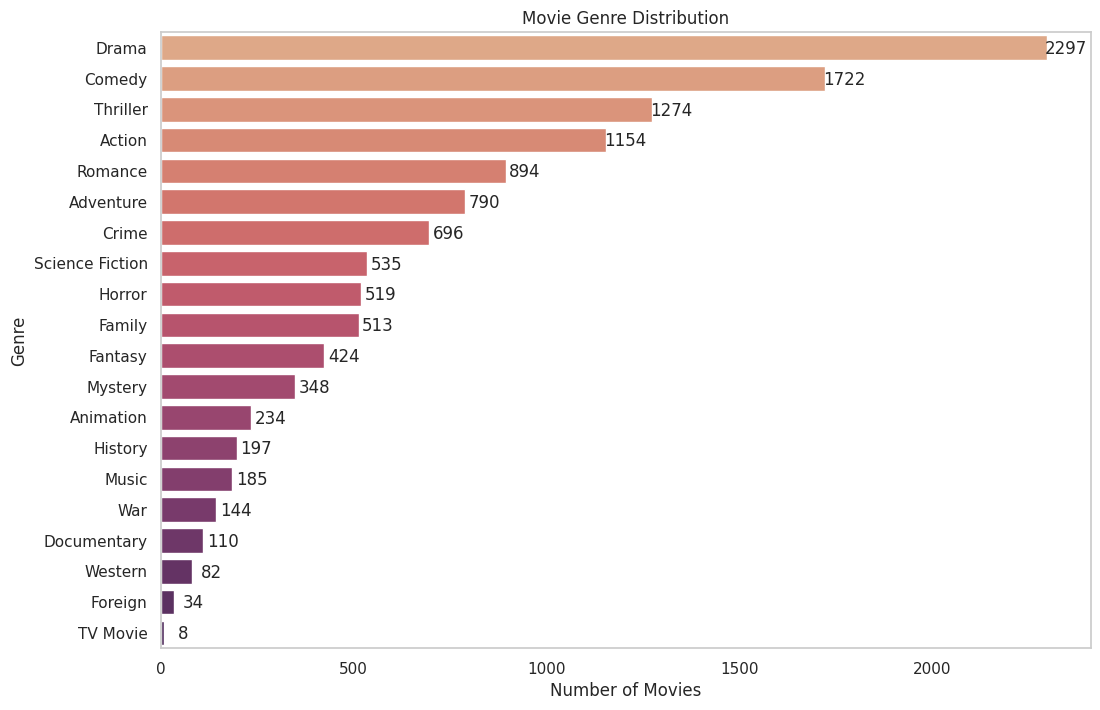

In [ ]:
# Convert Counter to a DataFrame for easier plotting
genres_df = pd.DataFrame(genres_info.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Count', y='Genre', data=genres_df, palette='flare')

plt.title('Movie Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(False)
# Annotate each bar with the count value, adjusting the position further to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 50,  # Increase the offset here
             p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

# **Analyzing Genre Popularity Over Time:**
**Description:** The code then explodes the 'genres' column to create a new DataFrame that shows the count of each genre per release year. It then creates an area plot to visualize the popularity of different genres over time.

**Analysis:** The time-based analysis of genre popularity can reveal interesting trends and shifts in audience preferences. The area plot allows you to observe how the prominence of certain genres has changed over the years, potentially providing insights into the evolution of the movie industry and the factors that influence genre preferences (e.g., cultural changes, technological advancements, generational shifts).

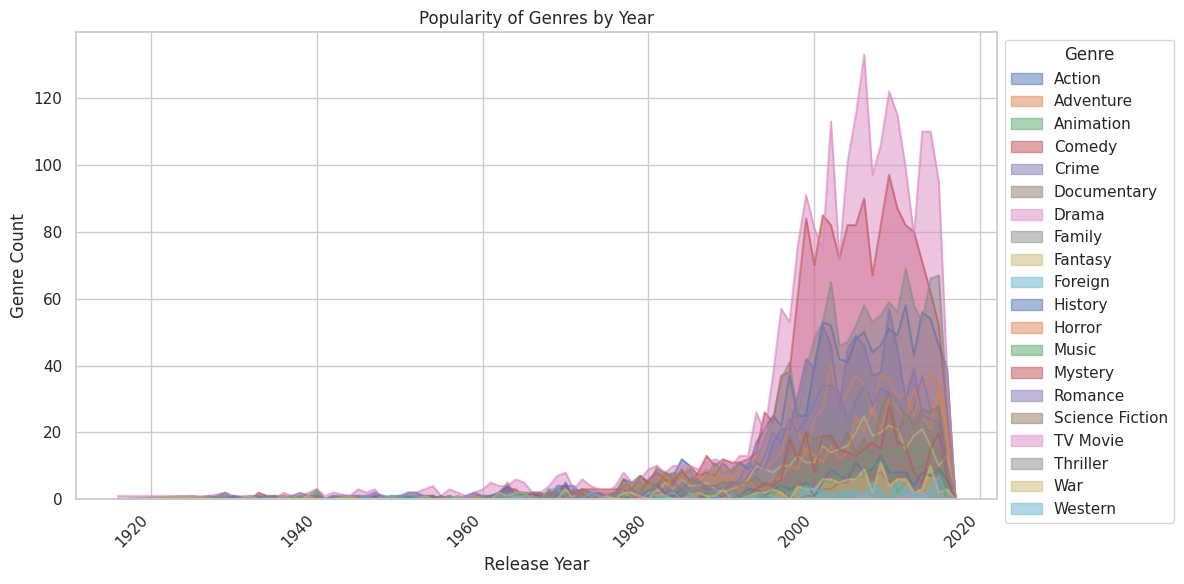

In [ ]:
# Assuming your data is a DataFrame named 'df' with columns 'genres' (list of strings) and 'release_year' (number)
# Explode genres directly within the DataFrame
df_explode = df.explode('genres')

# Group by year and genre, calculate genre counts
genre_counts_by_year = (
    df_explode.groupby(['release_year', 'genres'])['genres']
    .count()
    .unstack()
    .fillna(0)
)

# Normalize counts (optional)
# genre_counts_by_year = genre_counts_by_year.div(genre_counts_by_year.sum(axis=1), axis=0)

# Plotting popular genres by year
genre_counts_by_year.plot(kind='area', stacked=False, figsize=(12, 6))
plt.xlabel('Release Year')
plt.ylabel('Genre Count')
plt.title('Popularity of Genres by Year')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


Entertainment Value: The high presence of comedy, action, and adventure reflects a desire for films that are fun, engaging, and provide an escape from reality.


# **Correlation Analysis:**
**Description:** The code calculates the correlation matrix using the numeric columns in the DataFrame and creates a heatmap to visualize the correlations.

**Analysis:** The correlation analysis can uncover relationships between different movie attributes, such as revenue, budget, profit, and popularity metrics. This information can be valuable for understanding the interdependencies between these factors and potentially identifying key drivers of movie success.

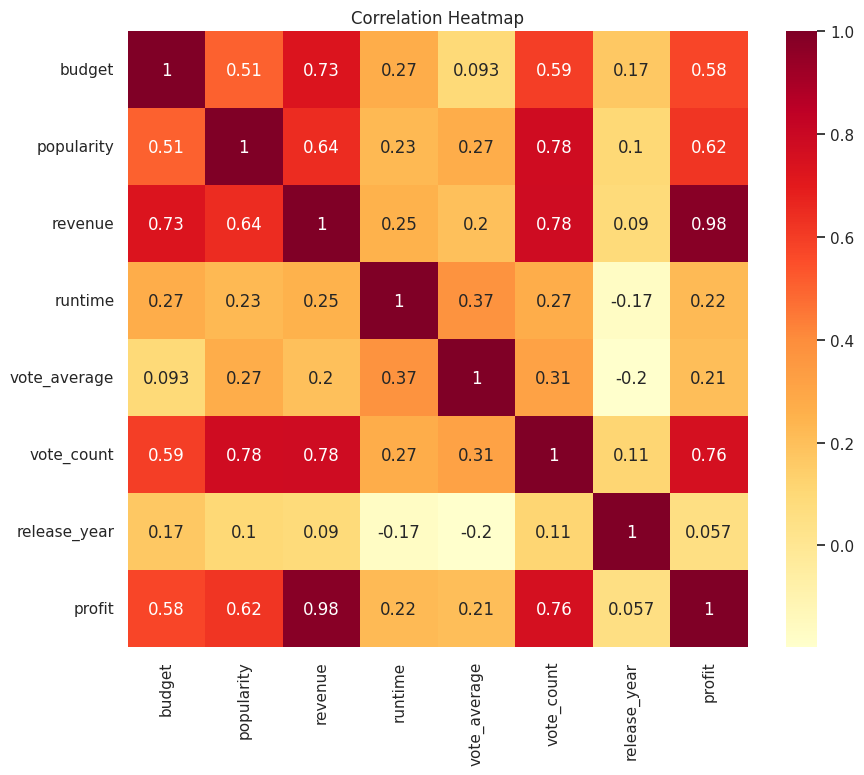

In [ ]:
# Identify the numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix using only the numeric columns
corr_matrix = df[numeric_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix

budget  popularity   revenue   runtime  vote_average  \
budget        1.000000    0.505414  0.730823  0.269967      0.093146   
popularity    0.505414    1.000000  0.644724  0.225661      0.273952   
revenue       0.730823    0.644724  1.000000  0.251208      0.197150   
runtime       0.269967    0.225661  0.251208  1.000000      0.374581   
vote_average  0.093146    0.273952  0.197150  0.374581      1.000000   
vote_count    0.593180    0.778130  0.781487  0.272068      0.312997   
release_year  0.168899    0.101916  0.090131 -0.167233     -0.198513   
profit        0.575852    0.620854  0.978881  0.220032      0.208241   

              vote_count  release_year    profit  
budget          0.593180      0.168899  0.575852  
popularity      0.778130      0.101916  0.620854  
revenue         0.781487      0.090131  0.978881  
runtime         0.272068     -0.167233  0.220032  
vote_average    0.312997     -0.198513  0.208241  
vote_count      1.000000      0.114144  0.758379  
release_year    0.114144      1.000000  0.057371  
profit          0.758379      0.057371  1.000000

# **Production Company and Country Analysis:**
**Description:** The code counts the number of movies produced by each production company and production country, then creates bar charts to visualize the top companies and countries.

**Analysis:** This analysis provides insights into the landscape of the movie industry, highlighting the dominant players in terms of production companies and countries. It can be useful for understanding the distribution of power, influence, and resources within the industry, as well as potential geographical and cultural biases.

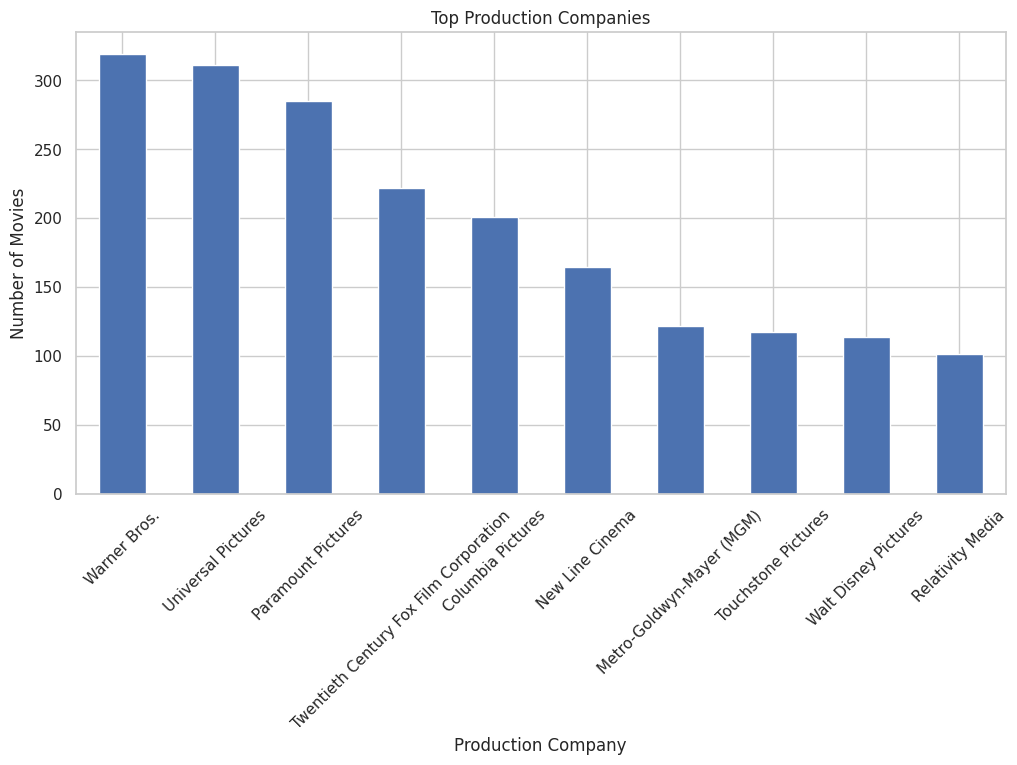

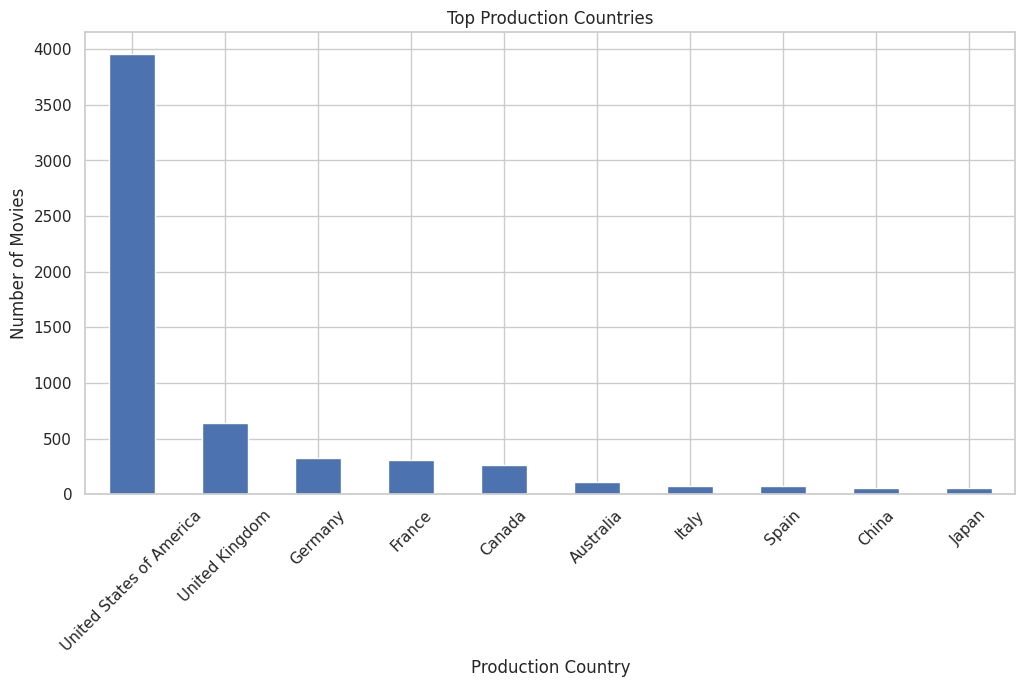

In [ ]:
# Count the number of movies per production company
company_counts = df['production_companies'].explode().value_counts()

# Plot the top production companies
plt.figure(figsize=(12, 6))
company_counts.head(10).plot(kind='bar', x='production_companies', y='count')
plt.title('Top Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Count the number of movies per production country
country_counts = df['production_countries'].explode().value_counts()

# Plot the top production countries
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar', x='production_countries', y='count')
plt.title('Top Production Countries')
plt.xlabel('Production Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count the number of movies per spoken language
language_counts = df['spoken_languages'].explode().value_counts()

# Plot the top spoken languages
plt.figure(figsize=(12, 6))
language_counts.head(10).plot(kind='bar', x='spoken_languages', y='count')
plt.title('Top Spoken Languages')
plt.xlabel('Spoken Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# **Keyword Analysis:**
**Description:** The code first counts the occurrences of each keyword in the 'keywords' column, then creates a bar chart to visualize the most common keywords. It also generates a word cloud to provide a more visual representation of the prominent keywords.

**Analysis:** The keyword analysis can reveal the thematic focus and narrative elements that are prevalent in the movies within the dataset. This information can be useful for understanding the types of stories, themes, and genres that resonate with audiences, as well as identifying potential areas of innovation or underrepresentation.

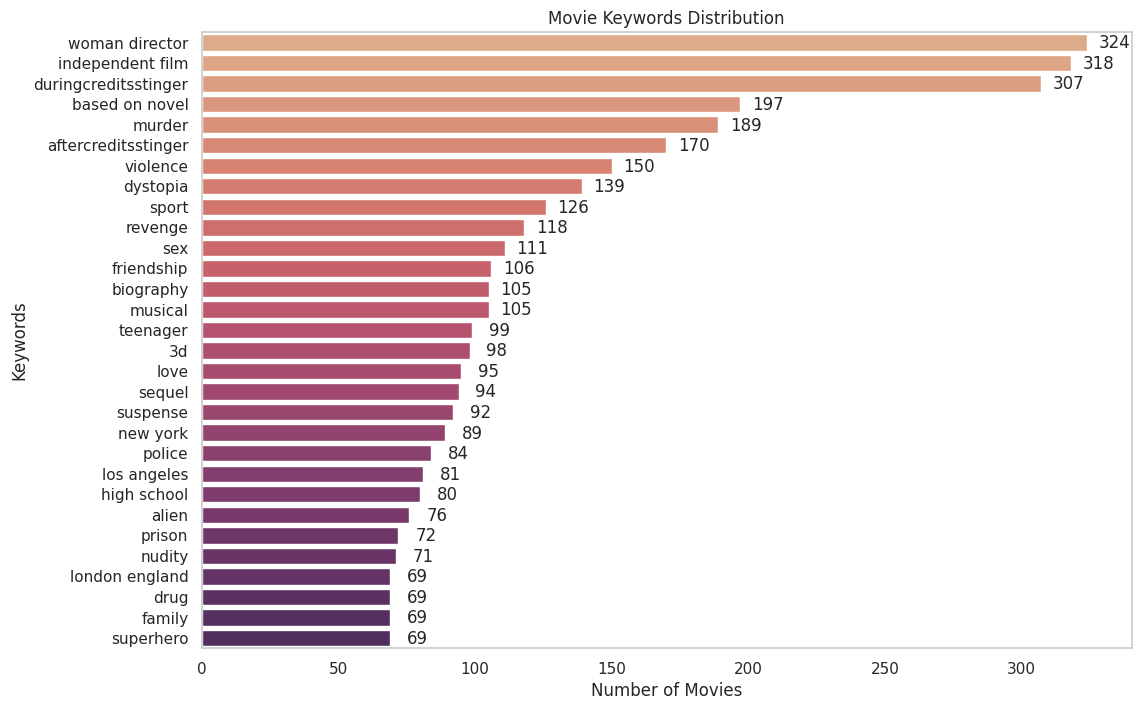

In [ ]:
# Convert Counter to a DataFrame for easier plotting
keywords_flatten = sum(df["keywords"].values, []) # keywords are list of lists
keywords_info = Counter(keywords_flatten)
keywords_df = pd.DataFrame(keywords_info.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Count', y='Genre', data=keywords_df.head(30), palette='flare')

plt.title('Movie Keywords Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Keywords')
plt.grid(False)
# Annotate each bar with the count value, adjusting the position further to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 10,  # Increase the offset here
             p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

In [ ]:
# Flatten the list of keywords
all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]

# Count the occurrences of each keyword
keyword_counts = Counter(all_keywords)

# Create a wordcloud to visualize the top keywords
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=80).generate_from_frequencies(keyword_counts)
plt.imshow(wordcloud)
plt.title('Most Common Keywords')
plt.axis('off')
plt.show()

In [ ]:
# Combine all movie descriptions into one large text string
text = " ".join(overview for overview in df['overview'].dropna())

# Create and generate a word cloud image
wordcloud_overview = WordCloud(background_color="lightgray", max_words=1000, contour_width=3, contour_color='flare', width=1920, height=1080).generate(text)

# Display the generated image using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_overview, interpolation='bilinear')
plt.axis("off")  # Don't show axis to make it visually clean
plt.show()

# **Creative Role Analysis:**
**Description:** The code analyzes the top directors, writers, and producers by counting the number of movies they are associated with and creating bar charts to visualize the results.

**Analysis:** This analysis provides insights into the key creative contributors behind the movies in the dataset. It can be useful for understanding the influence and importance of different creative roles, as well as potentially identifying individuals or teams that have consistently produced successful movies.

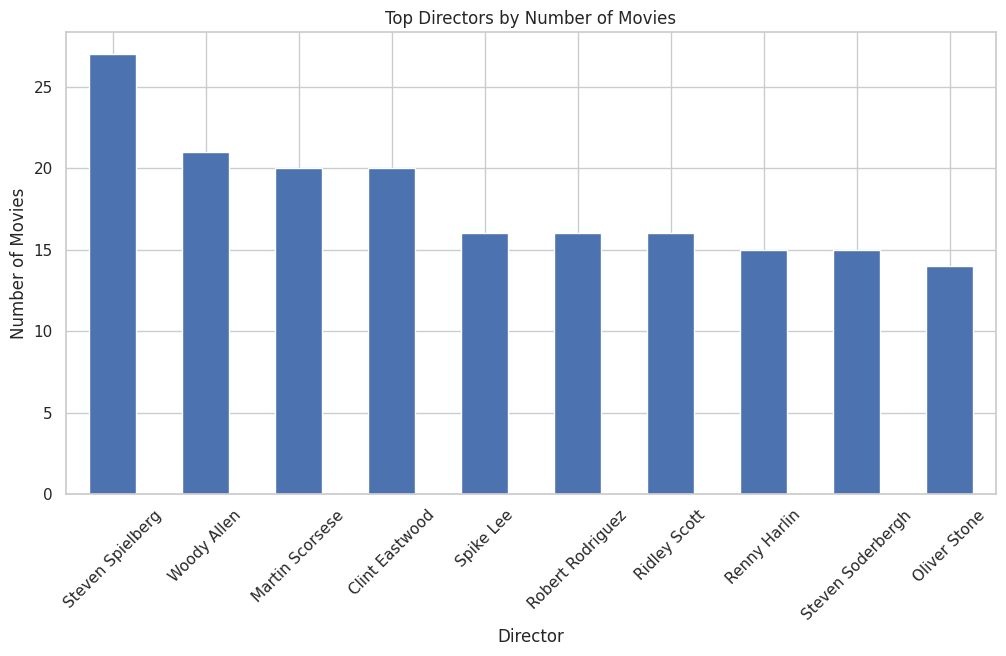

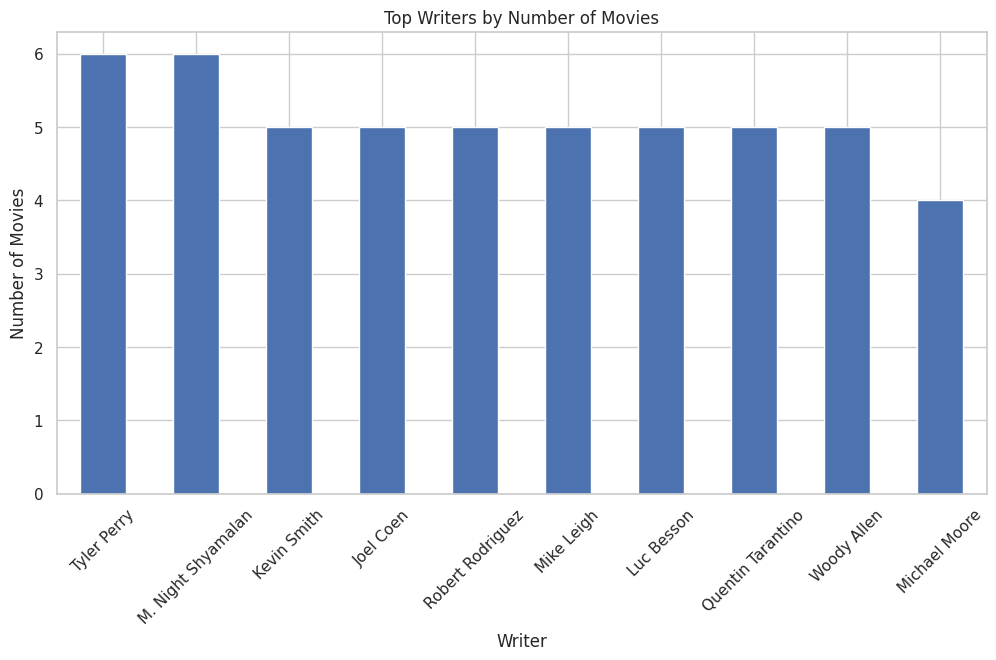

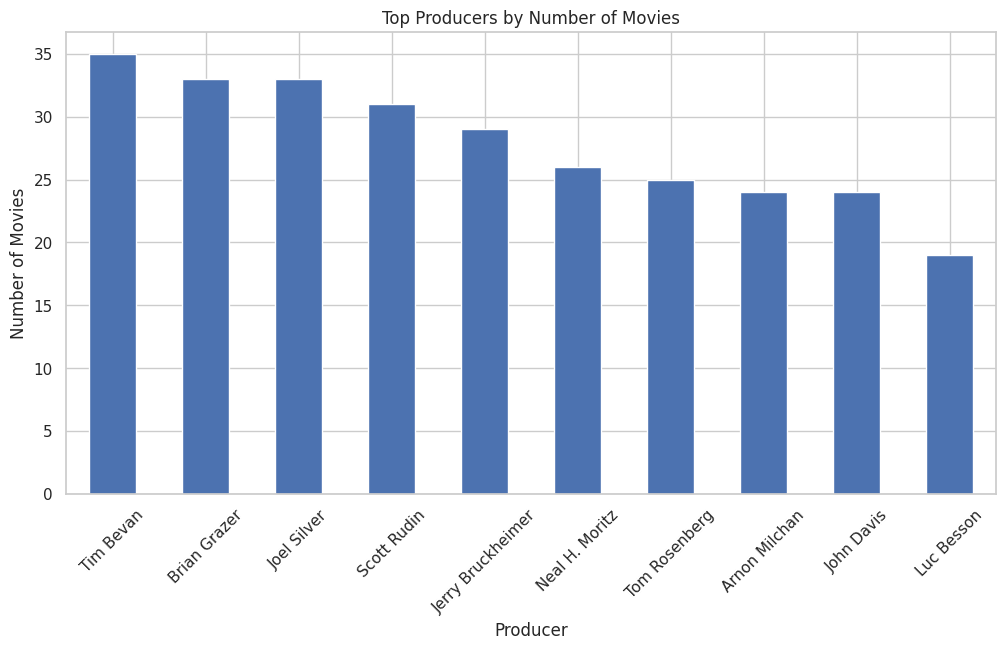

In [ ]:
# Analyze director
director_movies = df.groupby('director')['original_title'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
director_movies.head(10).plot(kind='bar')
plt.title('Top Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Analyze writer
writer_movies = df.groupby('writer')['original_title'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
writer_movies.head(10).plot(kind='bar')
plt.title('Top Writers by Number of Movies')
plt.xlabel('Writer')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Analyze producer
producer_movies = df.groupby('producer')['original_title'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
producer_movies.head(10).plot(kind='bar')
plt.title('Top Producers by Number of Movies')
plt.xlabel('Producer')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

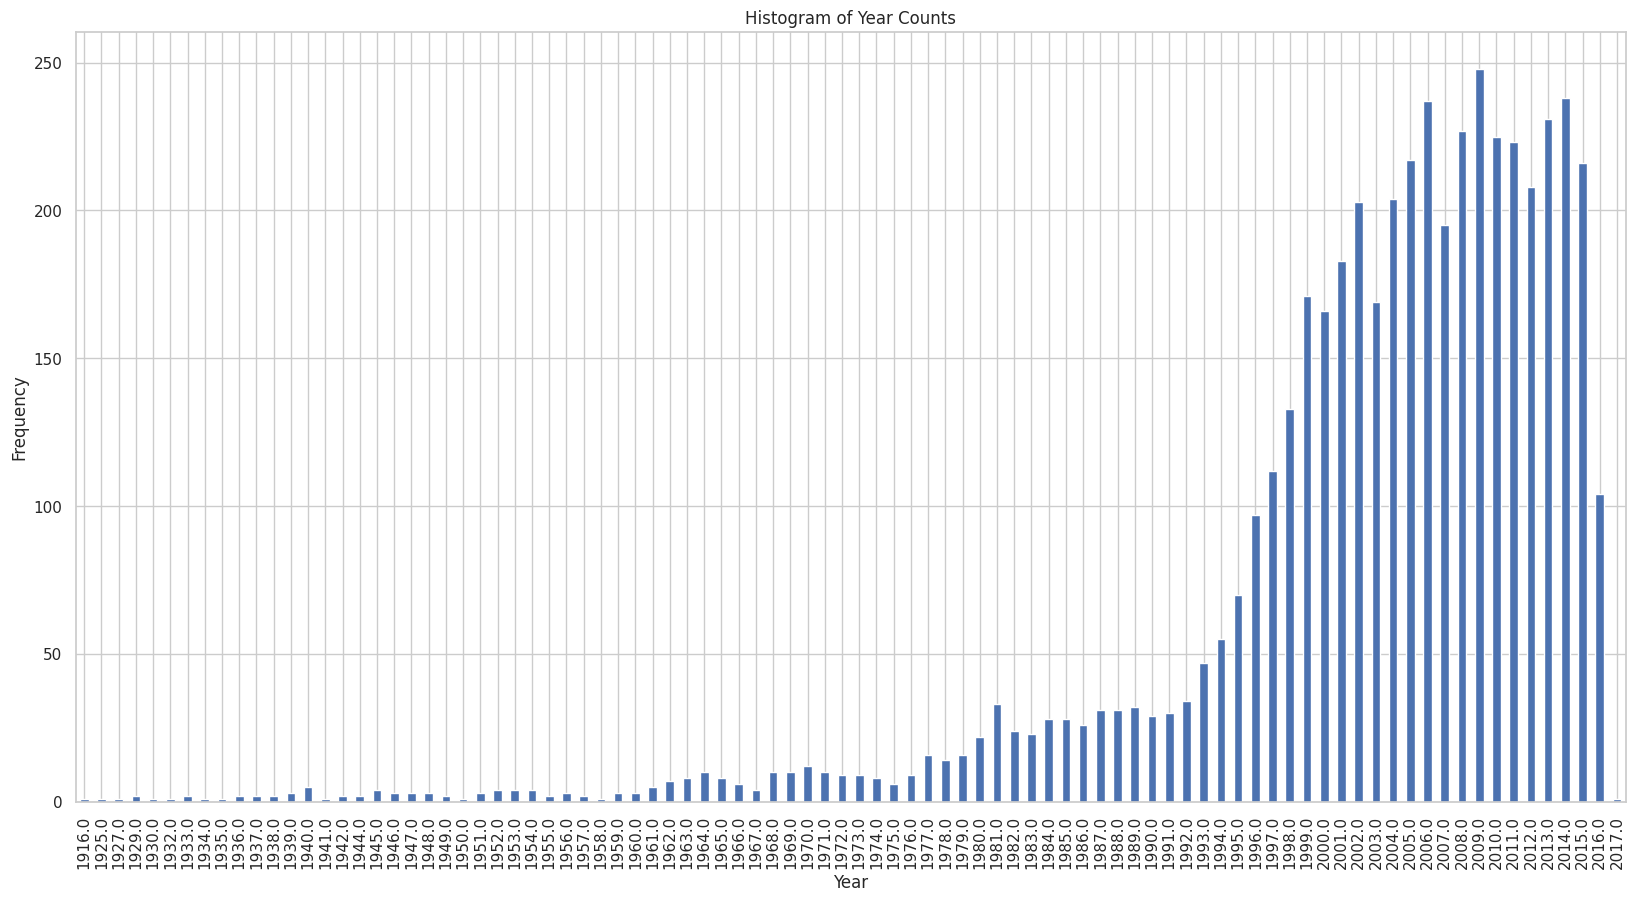

In [ ]:
year_count = df.sort_values('release_year').groupby('release_year').size()
#print(year_count)
plt.figure(figsize=(20, 10))
year_count.plot(kind = 'bar')
#plt.hist(year_count.index, bins=len(year_count), weights=year_count.values, edgecolor='black')
plt.xticks(rotation= 90)
plt.title('Histogram of Year Counts')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

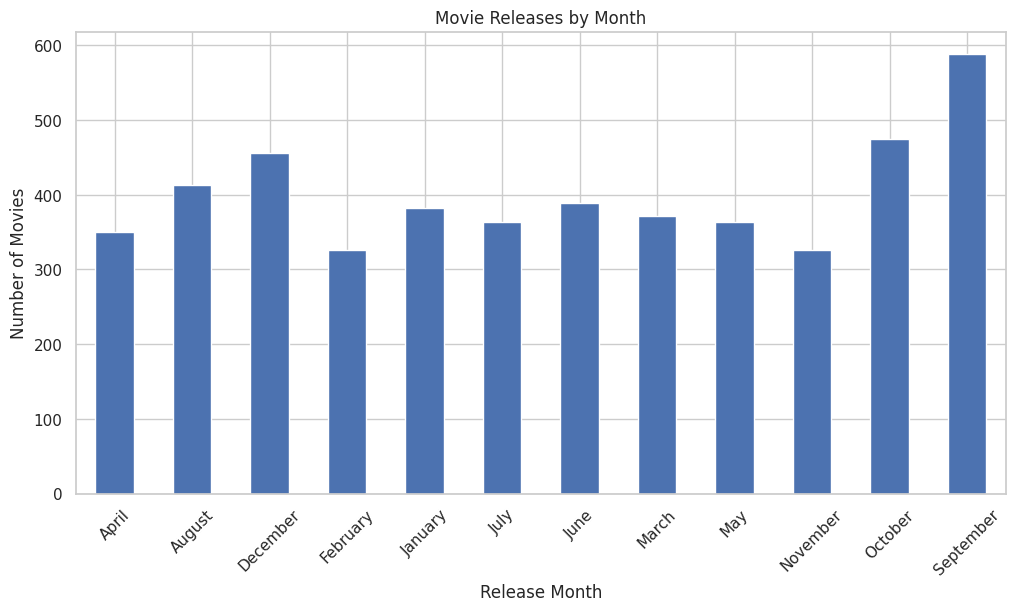

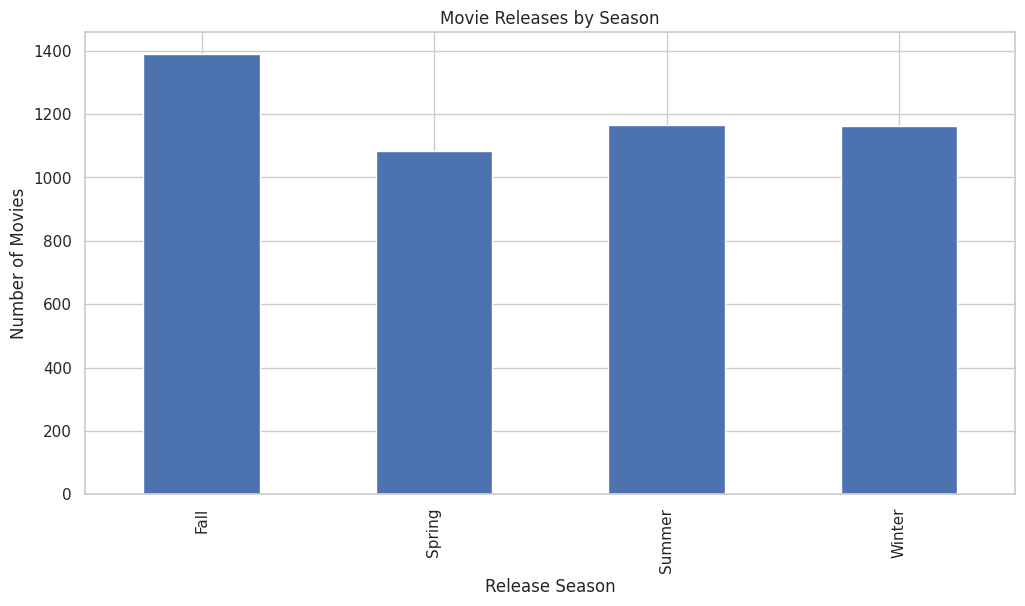

In [ ]:
# Analyze movie releases by month
month_counts = df.groupby('release_month')['original_title'].count()
plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar')
plt.title('Movie Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Analyze movie releases by season
df['release_season'] = df['release_month'].apply(lambda x: 'Winter' if x in ['December', 'January', 'February']
                                                else 'Spring' if x in ['March', 'April', 'May']
                                                else 'Summer' if x in ['June', 'July', 'August']
                                                else 'Fall')
season_counts = df.groupby('release_season')['original_title'].count()
plt.figure(figsize=(12, 6))
season_counts.plot(kind='bar')
plt.title('Movie Releases by Season')
plt.xlabel('Release Season')
plt.ylabel('Number of Movies')
plt.show()

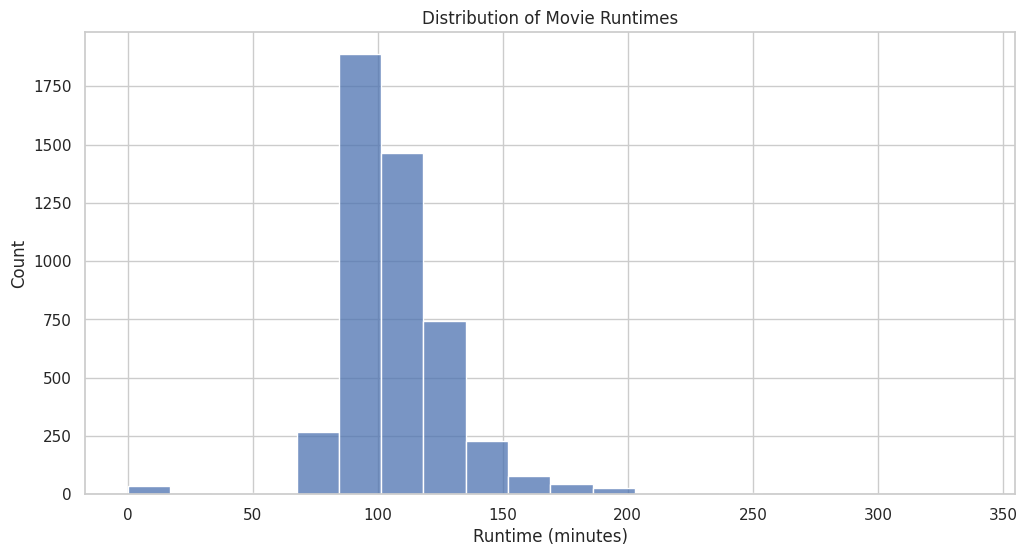

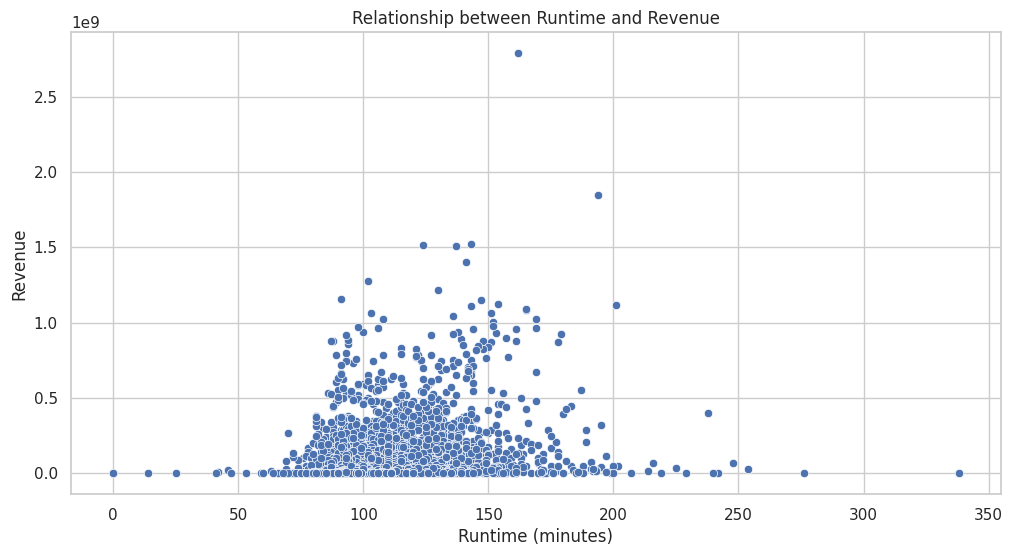

In [ ]:
# Analyze the distribution of movie runtimes
plt.figure(figsize=(12, 6))
sns.histplot(df['runtime'], bins=20)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between runtime and other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime', y='revenue', data=df)
plt.title('Relationship between Runtime and Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.show()

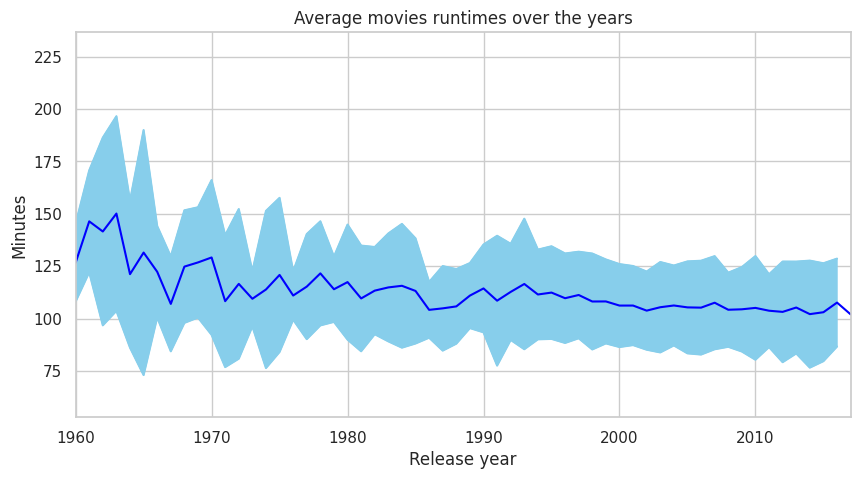

In [ ]:
grouped_data = df['runtime'].groupby(df['release_year']).describe()
avg_runtime_by_year = grouped_data['mean']
avg_runtime_min = grouped_data['mean'] - grouped_data['std']
avg_runtime_max = grouped_data['mean'] + grouped_data['std']
fig, x = plt.subplots(figsize=(10,5))
x.plot(avg_runtime_by_year, color='blue')
x.plot(avg_runtime_min, color='skyblue')
x.plot(avg_runtime_max, color='skyblue')
x.fill_between(grouped_data.index, avg_runtime_min, avg_runtime_max, color="skyblue")
x.set_title('Average movies runtimes over the years')
x.set_xlabel('Release year')
x.set_ylabel('Minutes')
x.set_xlim(1960,2017)
plt.grid(True)
plt.show()

The graph you sent me shows the average movie budget and revenue by release year. It appears to cover movies released from 1920 to 2020. Here are some observations based on the graph:

Average movie budgets have increased significantly over the years. In 1920, the average budget was around $20 million (in today's dollars). By 2020, the average budget had risen to over $100 million.

Average movie revenue, on the other hand, appears to have declined over the years. In 1920, the average revenue was around $1 billion (in today's dollars). By 2020, the average revenue had fallen to around $500 million.

There are a few possible explanations for this trend. One possibility is that the cost of making movies has simply gone up over time. This could be due to a number of factors, such as inflation, the increasing use of special effects, and the rising salaries of actors and directors.

Another possibility is that the market for movies has become more saturated. With so many movies being released each year, it is becoming increasingly difficult for any one movie to stand out and attract a large audience. This could lead to lower average revenue for all movies.

It is also important to note that the graph only shows average movie budgets and revenue. There is a great deal of variation among individual movies. Some movies are made for very little money and go on to become huge hits, while others are made for hundreds of millions of dollars and flop at the box office.

<Figure size 1200x600 with 0 Axes>

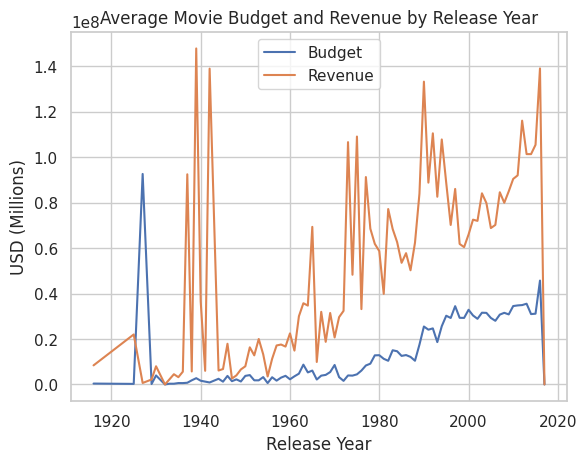

In [ ]:
# Group the data by release year and calculate the mean budget and mean revenue
budget_revenue_by_year = df.groupby('release_year')[['budget', 'revenue']].mean()

# Create the plot
plt.figure(figsize=(12, 6))
budget_revenue_by_year.plot(kind='line')
plt.title('Average Movie Budget and Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('USD (Millions)')
plt.legend(['Budget', 'Revenue'])
plt.grid(True)
plt.show()

# **Vote Average and Vote Count Analysis:**
**Description:** The code analyzes the distribution of the 'vote_average' and 'vote_count' columns, and then examines the relationships between these metrics and other features, such as revenue.

**Analysis:** The vote average and vote count are important indicators of audience perception and engagement. Analyzing their distributions can reveal patterns in how audiences rate and interact with the movies. Exploring the relationships between these metrics and other factors, such as revenue, can provide insights into the factors that contribute to a movie's success or popularity.

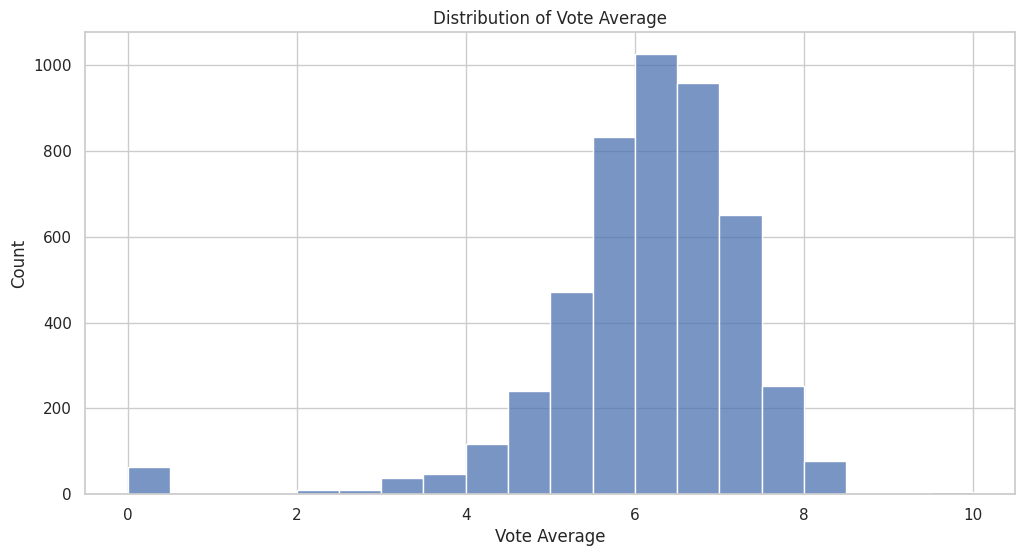

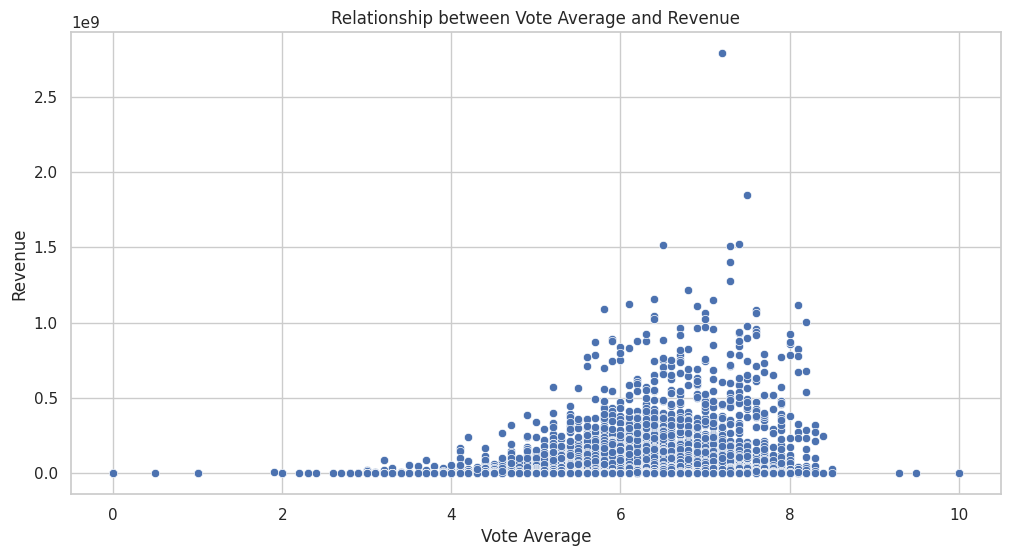

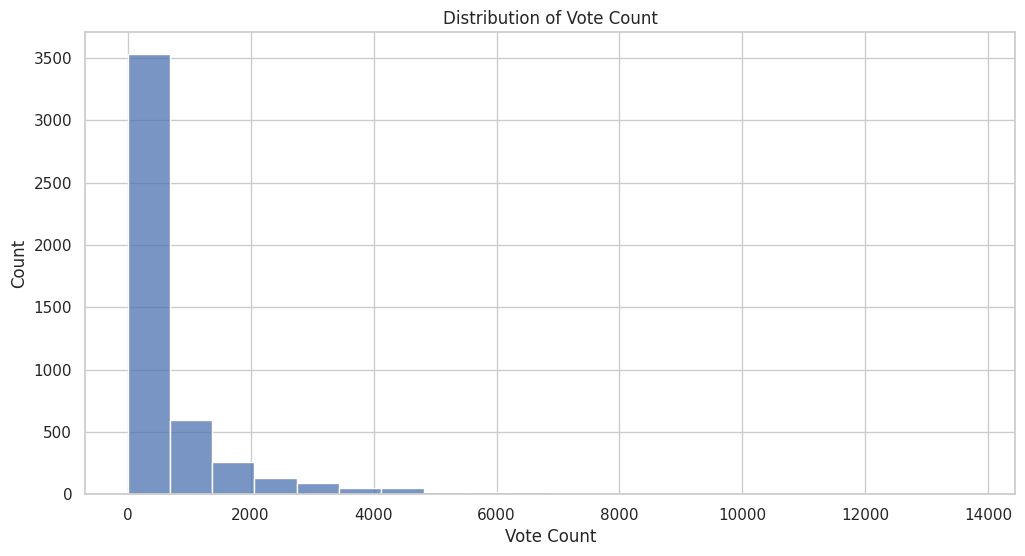

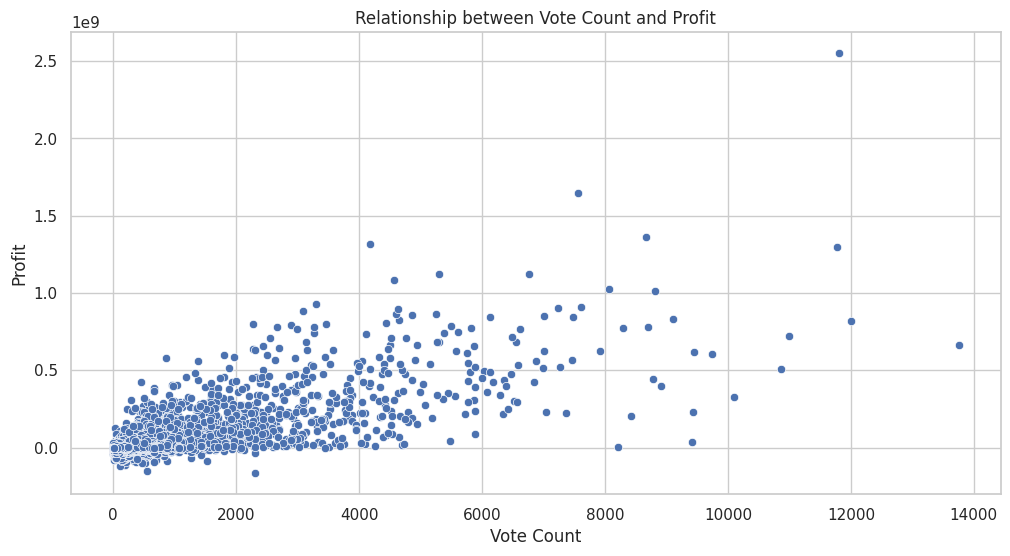

In [ ]:
# Analyze the distribution of vote_average
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], bins=20)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between vote_average and other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='vote_average', y='revenue', data=df)
plt.title('Relationship between Vote Average and Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

# Analyze the distribution of vote_count
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_count'], bins=20)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between vote_count and other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='vote_count', y='profit', data=df)
plt.title('Relationship between Vote Count and Profit')
plt.xlabel('Vote Count')
plt.ylabel('Profit')
plt.show()

# **Genre Combination Analysis:**
**Description:** The code creates a matrix to store the count of genre combinations, and then visualizes the relationships between different genres using a heatmap.

**Analysis:** This analysis provides a deeper understanding of how genres are combined in movies. The genre combination heatmap can reveal interesting patterns, such as which genres tend to co-occur more frequently or which genre pairings are less common. This information can be valuable for understanding audience preferences, identifying potential market opportunities, or exploring creative storytelling approaches.
Genre-Specific Correlations:
Analyzing the budget-revenue correlations on a per-genre basis can provide insights into the financial dynamics of different types of movies. This information can be useful for understanding the relative profitability and risk profiles of various genres, which can inform production and investment decisions.

Some genres are more frequently combined than others. For example, there are a lot of movies that combine comedy with drama or romance. This is likely because these genres can complement each other well. Comedies can help to lighten the mood of a drama, while romance can add emotional depth to a comedy.
Some genres are rarely combined. For example, there are very few movies that combine documentary with horror or fantasy. This is likely because these genres are very different in tone and style. It would be difficult to create a movie that successfully blends the seriousness of a documentary with the fantastical elements of horror or fantasy.
There are some interesting patterns in the data. For example, there seems to be a block of genres in the middle of the heatmap that are all frequently combined with each other. This block includes genres such as comedy, drama, romance, action, and thriller. These genres are all relatively similar in style and tone, which may explain why they are often combined.

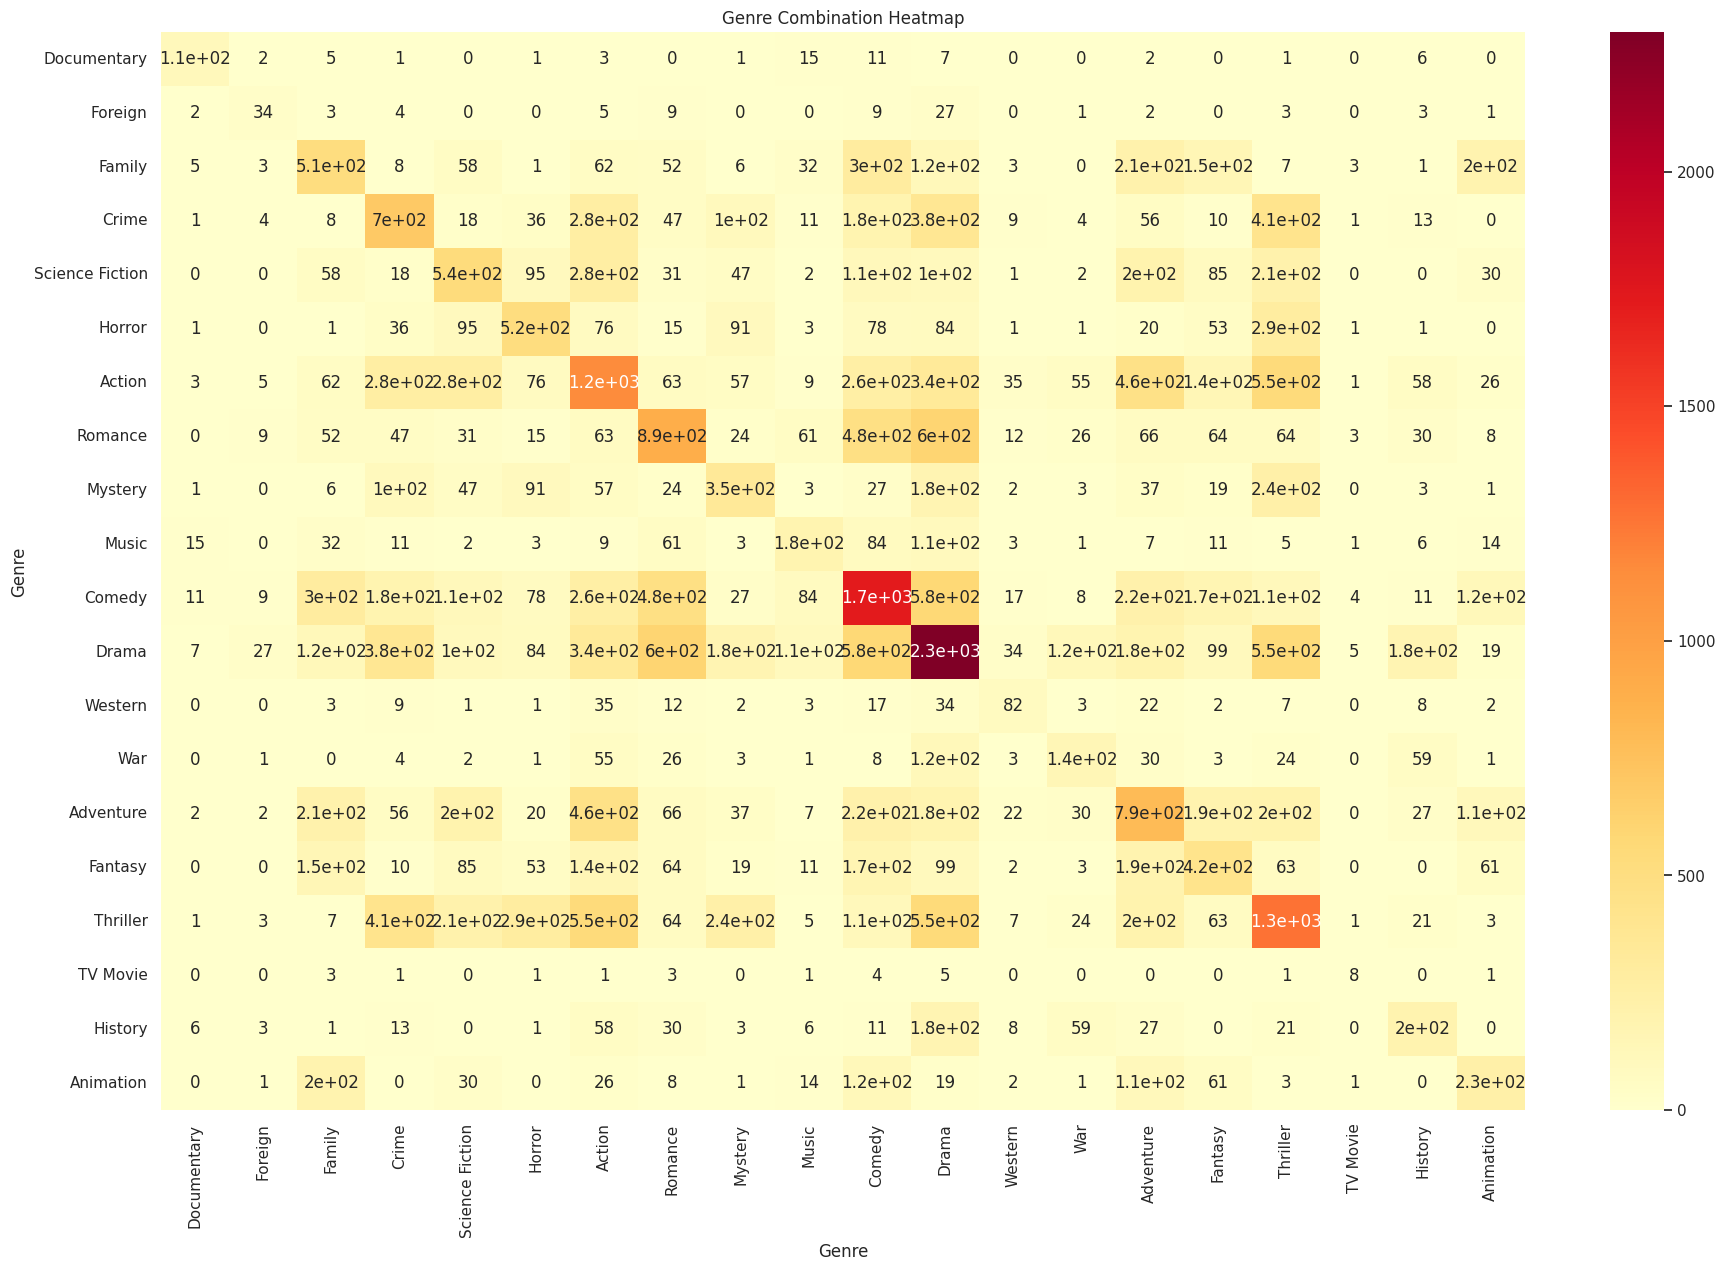

In [ ]:
# Create a list of unique genres
all_genres = list(set([genre for genres in df['genres'] for genre in genres]))

# Create a matrix to store the count of genre combinations
genre_matrix = pd.DataFrame(0, index=all_genres, columns=all_genres)

# Populate the genre matrix
for _, row in df.iterrows():
    genres = row['genres']
    for g1 in genres:
        for g2 in genres:
            genre_matrix.loc[g1, g2] += 1

# Create a heatmap to visualize the genre combinations
plt.figure(figsize=(22, 14))
sns.heatmap(genre_matrix, annot=True, cmap='YlOrRd')
plt.title('Genre Combination Heatmap')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Create a new DataFrame that duplicates movies for each of their genres
expanded_genre_df = df.explode('genres')

# Calculate correlations by genre
genre_correlations = {}
unique_genres = expanded_genre_df['genres'].unique()

for genre in unique_genres:
    genre_df = expanded_genre_df[expanded_genre_df['genres'] == genre]
    correlation = genre_df[['budget', 'revenue']].corr().iloc[0, 1]  # Get the budget-revenue correlation
    genre_correlations[genre] = correlation

genre_correlations

{'Action': 0.7516577448090541,
 'Adventure': 0.7092856253202227,
 'Fantasy': 0.7269122613151144,
 'Science Fiction': 0.7226657323999093,
 'Crime': 0.7493277357308499,
 'Drama': 0.6550162542425393,
 'Thriller': 0.7210153076418995,
 'Animation': 0.6684704064113359,
 'Family': 0.7037673085311068,
 'Western': 0.5119374017179531,
 'Comedy': 0.6854272086281317,
 'Romance': 0.6022230445736688,
 'Horror': 0.576130747884941,
 'Mystery': 0.6799105714665283,
 'History': 0.5637031989643804,
 'War': 0.549455437358861,
 'Music': 0.6072282914095369,
 'Documentary': 0.31273163706901075,
 'Foreign': 0.009001371957617762,
 'TV Movie': nan,
 nan: nan}

# **Defining Success Criteria and Preprocessing for Machine Learning:**
Description: The code defines a custom success criteria based on the movie's profit, and then creates a new DataFrame (df_ML) that includes this success indicator as a target variable. It then preprocesses the data by splitting it into training and testing sets, and applying PCA to reduce the dimensionality of the features.

Analysis: Defining a clear success criteria is an important step in the machine learning process. The approach used here, which considers a movie successful if its profit exceeds the mean profit plus one standard deviation, provides a reasonable threshold for identifying high-performing films. The preprocessing steps, including feature selection and dimensionality reduction, prepare the data for the subsequent model training and evaluation.

In [ ]:
# Define the success criteria
def is_successful(profit):
    mean_profit = df['profit'].mean()
    std_profit = df['profit'].std()
    if profit >= mean_profit + std_profit:
        return 1
    return 0

# Filter the movies into the new df (df_ML)
df_ML = df.copy(deep=True)

# Apply the success criteria and create a new column
df_ML['is_successful'] = df_ML['profit'].apply(is_successful)

# Calculate the success rate
success_rate = sum(df_ML['is_successful'] == 1) / len(df_ML) * 100
print(f"Success rate is {success_rate:.2f}%")

Success rate is 8.31%


In [ ]:
# Preprocess data and apply PCA
columns_for_X = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year']
X = df_ML[columns_for_X]
y = df_ML['is_successful']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# **Model Training and Evaluation:**
**Description:** The code trains and evaluates four different machine learning models (Logistic Regression, Decision Tree, Random Forest, and XGBoost) on the preprocessed data. It performs a grid search to tune the hyperparameters of each model and selects the best-performing model based on the highest accuracy score.

**Analysis:** Comparing the performance of multiple models is a common approach in machine learning projects. The grid search process helps identify the optimal hyperparameters for each model, which can have a significant impact on their predictive capabilities. Evaluating the models using confusion matrices, classification reports, and ROC curves provides a comprehensive assessment of their strengths and weaknesses. The selection of the best-performing model is a crucial step in developing a reliable predictive system.

In [ ]:
models = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(criterion='entropy', random_state=0),
    RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0),
    XGBClassifier()
]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       880
           1       0.88      0.64      0.74        81

    accuracy                           0.96       961
   macro avg       0.92      0.82      0.86       961
weighted avg       0.96      0.96      0.96       961


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       880
           1       0.66      0.75      0.71        81

    accuracy                           0.95       961
   macro avg       0.82      0.86      0.84       961
weighted avg       0.95      0.95      0.95       961


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       880
           1       0.82      0.67      0.73        81

    accuracy                           0.96       961
  

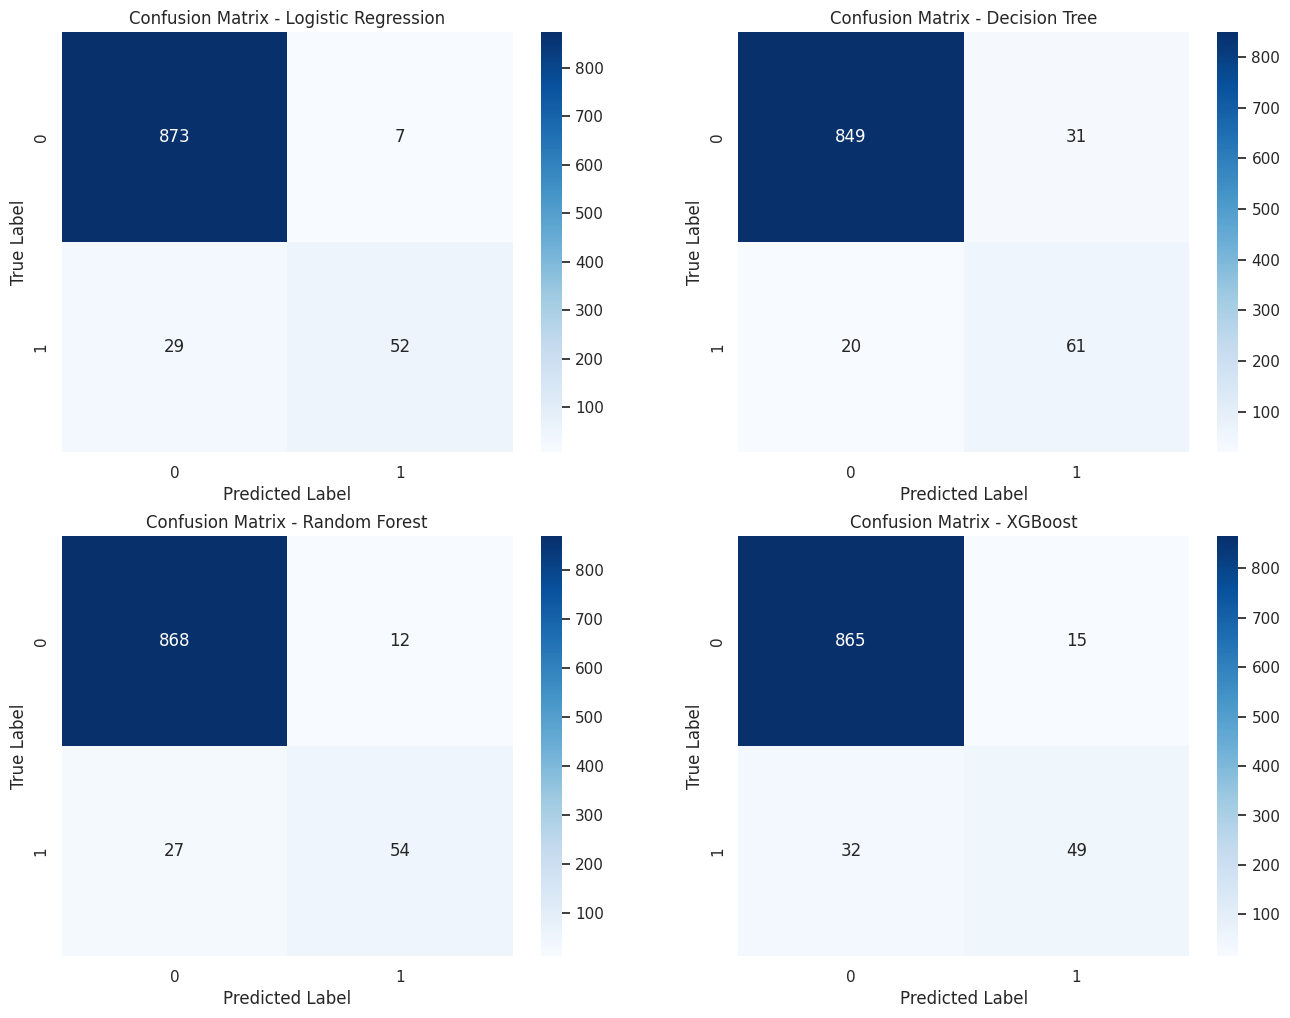

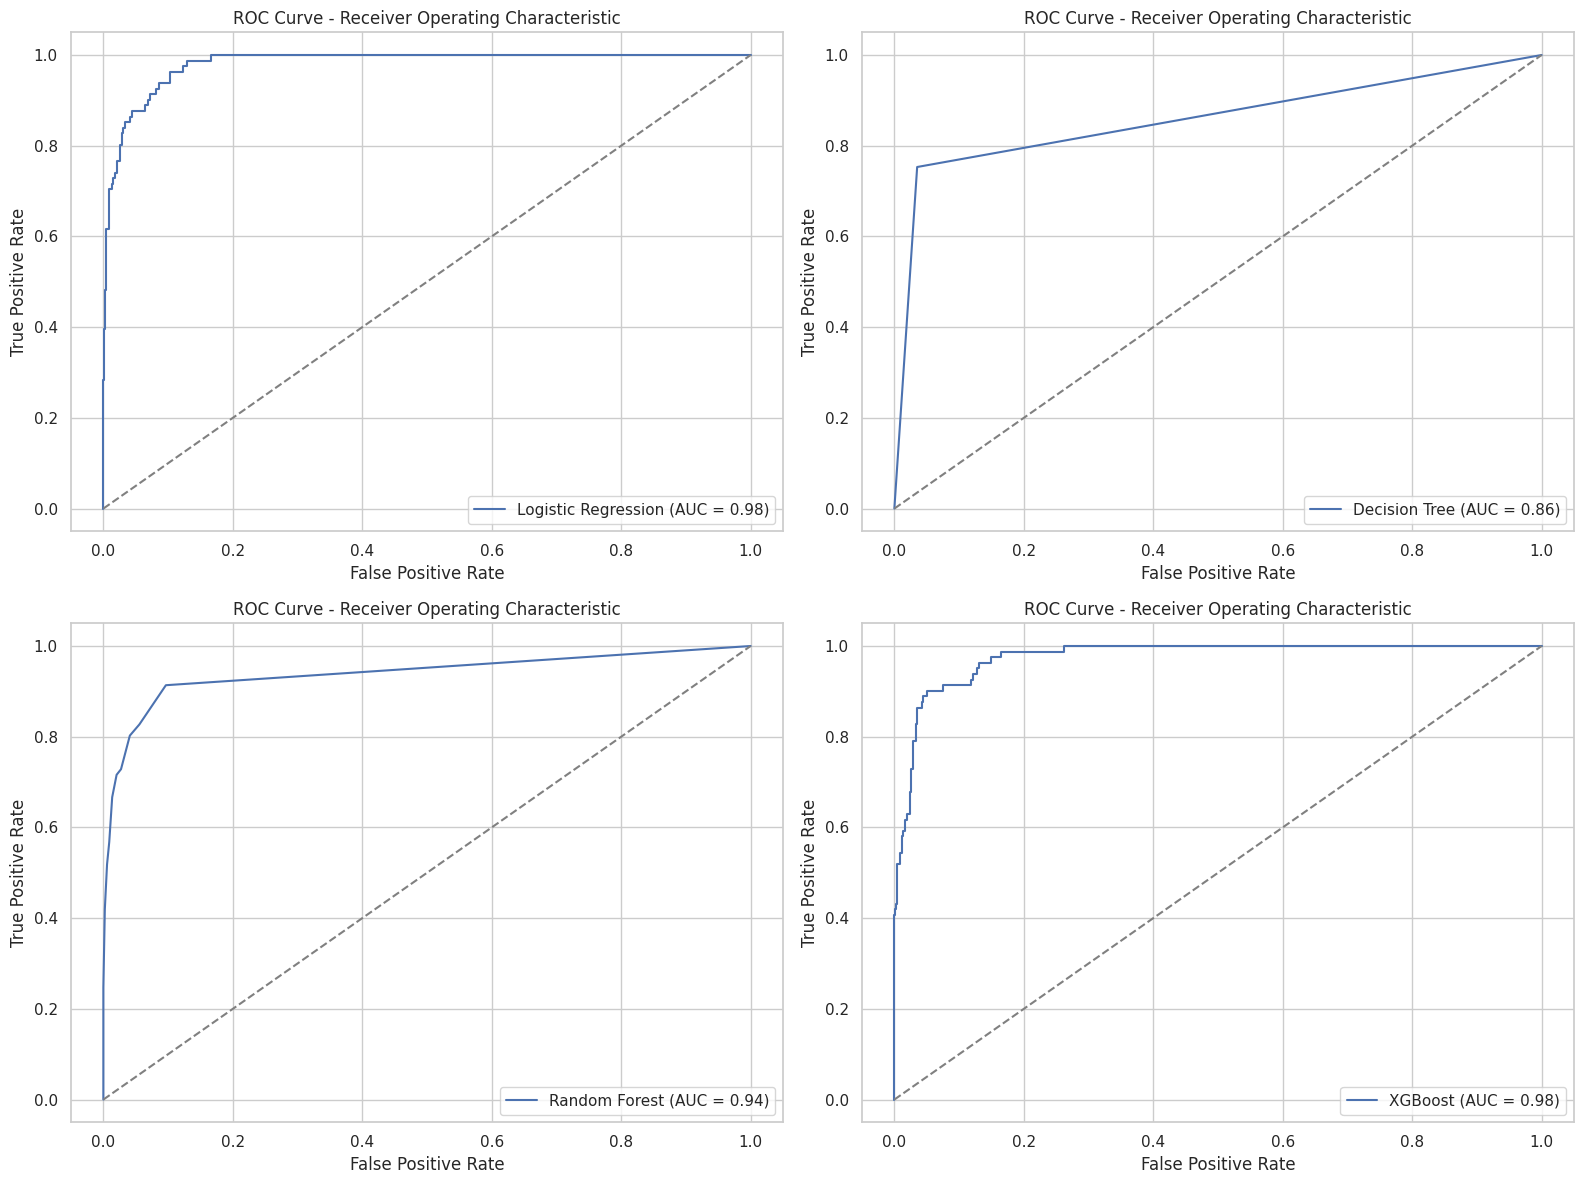

In [ ]:
# Create subplots for confusion matrices and ROC curves separately
fig, axes_cm = plt.subplots(2, 2, figsize=(16, 12))
fig, axes_roc = plt.subplots(2, 2, figsize=(16, 12))

for model, model_name, ax_cm, ax_roc in zip(models, model_names, axes_cm.flatten(), axes_roc.flatten()):
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', ax=ax_cm)
    ax_cm.set_title(f"Confusion Matrix - {model_name}")
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')

    # Classification report
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report - {model_name}:")
    print(report)

    # ROC curve
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    ax_roc.plot([0, 1], [0, 1], linestyle='--', color='grey')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('ROC Curve - Receiver Operating Characteristic')
    ax_roc.legend(loc='lower right')
    ax_roc.grid(True)

plt.tight_layout()
plt.show()


# **Metrics:**

 The report contains several metrics for each class (0 and 1) and overall:

**Precision:** Proportion of predicted positive cases that were actually positive.

**Recall:** Proportion of actual positive cases that were predicted positive.

**F1-Score:** Harmonic mean between precision and recall, a balanced measure.

**Support:** Total number of true cases in that class (e.g., number of data points belonging to class 0).

**Accuracy:** Proportion of total predictions that were correct.
Macro Average & Weighted Average: Different ways to summarize the performance across both classes.

Overall Performance: All models achieve a high overall accuracy (around 95-96%). This suggests they are good at classifying most data points correctly.

**Class-wise Performance:** There's a significant difference in performance between Class 0 and Class 1 for all models.

**Class 0:** All models have very high precision (0.96-0.98) and recall (0.96-0.99). This means they are very good at correctly identifying Class 0 instances.

**Class 1:** The models struggle more with Class 1. Precision is good (0.66-0.88) but recall is lower (0.60-0.75). This indicates the models sometimes miss actual Class 1 cases (False Negatives) or predict Class 1 for data points that aren't truly Class 1 (False Positives).
Model Comparison:

**Logistic Regression and Random Forest**: Perform very similarly with a slight edge to Logistic Regression in terms of Class 1 recall.

**Decision Tree:** Slightly lower overall accuracy and Class 1 performance compared to the others.

**XGBoost:** Lower overall accuracy and performance for both classes compared to Logistic Regression and Random Forest.

Missing values in X_train_pca_filled: 0
Missing values in X_test_pca_filled: 0
Class distribution in y_train: (array([0, 1]), array([3524,  318]))
Class distribution in y_test: (array([0, 1]), array([880,  81]))


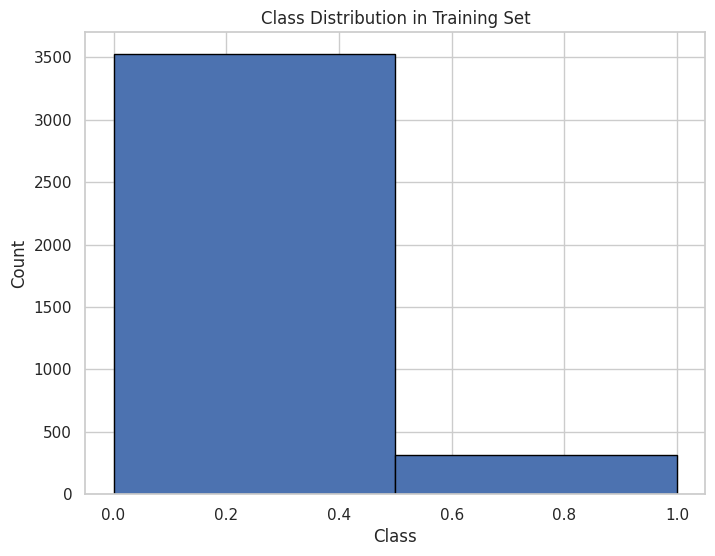

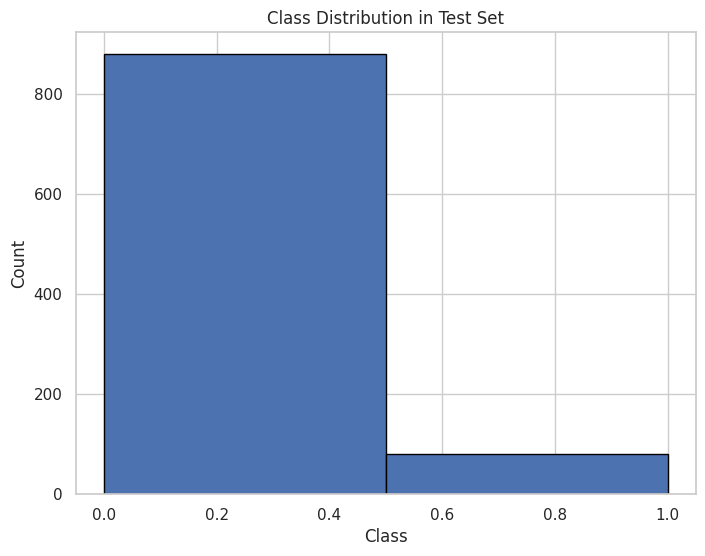

Tuning hyperparameters for Logistic Regression...
Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for XGBoost...

Best model: Logistic Regression
f1_score : nan
Precision: 0.5916666666666667
Recall: 0.8765432098765432
Accuracy: 0.9386056191467221


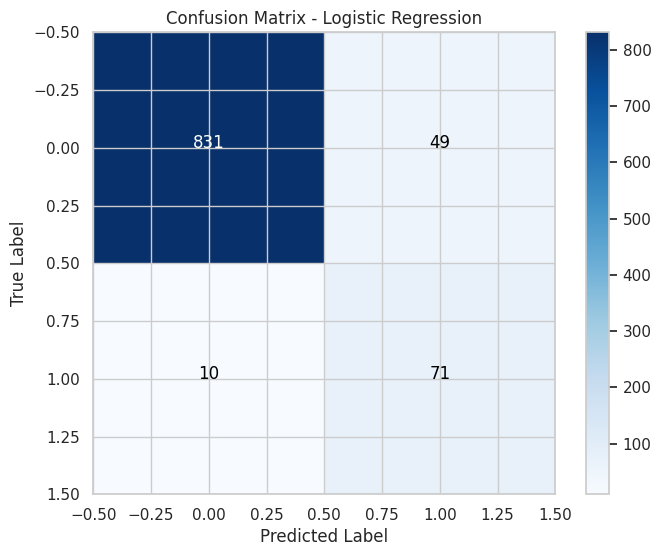


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       880
           1       0.59      0.88      0.71        81

    accuracy                           0.94       961
   macro avg       0.79      0.91      0.84       961
weighted avg       0.95      0.94      0.94       961



In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
# from sklearn.utils import class_weight
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the models dictionary
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'XGBoost': XGBClassifier()
# }

# # Define the hyperparameters grid for each model
# param_grids = {
#     'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': [None]},
#     'Decision Tree': {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10, 20]},
#     'Random Forest': {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 10]},
#     'XGBoost': {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 200]}
# }

# best_models = {}
# best_scores = {}

# # Handle missing data (if needed)
# imputer = SimpleImputer(strategy='mean')
# X_train_pca_filled = imputer.fit_transform(X_train_pca)
# X_test_pca_filled = imputer.transform(X_test_pca)

# # Check for missing values
# print(f"Missing values in X_train_pca_filled: {np.sum(np.isnan(X_train_pca_filled))}")
# print(f"Missing values in X_test_pca_filled: {np.sum(np.isnan(X_test_pca_filled))}")

# # Inspect the data distribution
# print(f"Class distribution in y_train: {np.unique(y_train, return_counts=True)}")
# print(f"Class distribution in y_test: {np.unique(y_test, return_counts=True)}")

# plt.figure(figsize=(8, 6))
# plt.hist(y_train, bins=2, edgecolor='black')
# plt.title('Class Distribution in Training Set')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.hist(y_test, bins=2, edgecolor='black')
# plt.title('Class Distribution in Test Set')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

# # Hyperparameter tuning and model training
# for name, model in models.items():
#     print(f"Tuning hyperparameters for {name}...")
#     if name == 'Logistic Regression':
#         # Compute class weights to handle imbalanced dataset
#         class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#         param_grids[name]['class_weight'] = [dict(zip(np.unique(y_train), class_weights))]
#     grid_search = GridSearchCV(model, param_grids[name], cv=10, scoring=f1_score)
#     grid_search.fit(X_train_pca_filled, y_train)
#     best_models[name] = grid_search.best_estimator_
#     best_scores[name] = grid_search.best_score_

# # Find the best model
# best_model_name = max(best_scores, key=best_scores.get)
# best_model = best_models[best_model_name]

# print(f"\nBest model: {best_model_name}")
# print(f"f1_score : {best_scores[best_model_name]}")

# # Evaluate the best model
# best_model.fit(X_train_pca_filled, y_train)
# y_pred_best_model = best_model.predict(X_test_pca_filled)

# # Validate the scoring metric
# print(f"Precision: {precision_score(y_test, y_pred_best_model)}")
# print(f"Recall: {recall_score(y_test, y_pred_best_model)}")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_best_model)}")

# # Confusion matrix and classification report for the best model
# cm = confusion_matrix(y_test, y_pred_best_model)

# plt.figure(figsize=(8, 6))
# plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
# plt.colorbar()
# plt.title(f'Confusion Matrix - {best_model_name}')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
# plt.show()

# print(f"\nClassification Report - {best_model_name}:")
# print(classification_report(y_test, y_pred_best_model))

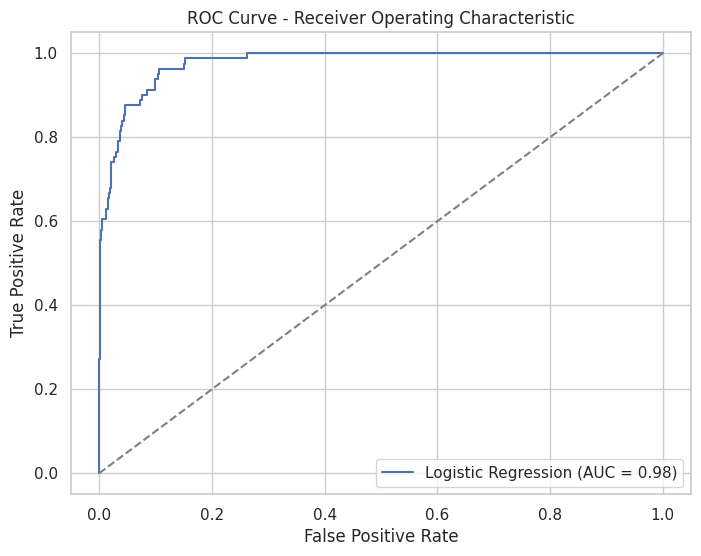

In [ ]:
# ROC curve for the best model
y_pred_proba_best_model = best_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best_model)
auc_score = roc_auc_score(y_test, y_pred_proba_best_model)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Recommendation System Development:**
 The code implements a content-based recommendation system. It first calculates a weighted rating for each movie, considering both the vote count and vote average. It then creates a TF-IDF matrix and a cosine similarity matrix based on the movie overviews, as well as additional features like cast, keywords, genres, and production details. Finally, it defines a function to provide movie recommendations based on a given title.

**Analysis:** The content-based recommendation system leverages the textual and feature-based information about the movies to identify similar titles that may be of interest to users. The weighted rating calculation incorporates both the popularity and quality aspects of the movies, ensuring that the recommendations are not solely based on popularity. The inclusion of various movie attributes, such as cast, genres, and production details, can help the system provide more relevant and diverse recommendations.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [ ]:
C = df['vote_average'].mean()
m = df['vote_count'].quantile(0.9)
q_movies = df.copy().loc[df['vote_count'] >= m]
C, m, q_movies.shape

(6.092171559442016, 1838.4000000000015, (481, 26))

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['original_title', 'vote_count', 'vote_average', 'score']].head(5)

original_title  vote_count  vote_average     score
1881  The Shawshank Redemption        8205           8.5  8.059258
662                 Fight Club        9413           8.3  7.939256
65             The Dark Knight       12002           8.2  7.920020
3232              Pulp Fiction        8428           8.3  7.904645
96                   Inception       13752           8.1  7.863239

In [ ]:
df['overview'] = df['overview'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()

tfidf_matrix.shape

(4803, 20978)

# **Recommendation System:**

In addition to the exploratory data analysis and predictive modeling tasks, this project also includes the development of a content-based recommendation system for movies.
The recommendation system leverages various movie attributes to identify similar titles that a user may be interested in.

** These attributes include:**
**Movie Overview:** The textual description of the movie's plot and themes.
**Cast**: The main actors featured in the movie.

**Keywords:** The keywords associated with the movie's content.

**Genres:** The genres the movie belongs to.

**Director:** The director of the movie.

**Writer:** The writer(s) of the movie.

**Producer:** The producer(s) of the movie.

**Production Companies:** The companies involved in the movie's production.

**Production Countries:** The countries where the movie was produced.

To create the recommendation system, the project first preprocesses these features by cleaning and normalizing the data. It then applies a Term Frequency-Inverse Document Frequency (TF-IDF) vectorization technique to the movie overviews, generating a matrix that captures the importance of each word in the text. Additionally, the project combines all the aforementioned features into a single, joined feature to capture the overall similarity between movies.
Using the TF-IDF
matrix and the combined feature matrix, the project calculates the cosine similarity between movies, which serves as the basis for the recommendation system. The recommendation function takes a movie title as input and returns the top N most similar movies, along with their similarity scores.

This recommendation system can be used to suggest movies that are likely to appeal to a user based on their preferences and the characteristics of movies they have enjoyed in the past. The inclusion of this component in the project adds valuable functionality and can enhance the user experience by providing personalized movie recommendations.

By integrating the recommendation system with the insights gained from the exploratory data analysis and predictive modeling, the project aims to provide a comprehensive solution for understanding and predicting movie success, as well as offering personalized recommendations to users.

Recommender System:
Generally, a recommender system performs under certain similarity measures
between the prefered items by different users. They are used to predict the
rating or preference that a user would give to an item. Almost every major
tech company has applied them in some form or the other: Amazon uses it
to suggest products to customers, YouTube uses it to decide which video to
play next on autoplay, and Facebook uses it to recommend pages to like
and people to follow. Moreover, companies like Netflix and Spotify depend
highly on the effectiveness of their recommendation engines for their
business and sucees.
The similarity mesuare is generally, cosine similarity 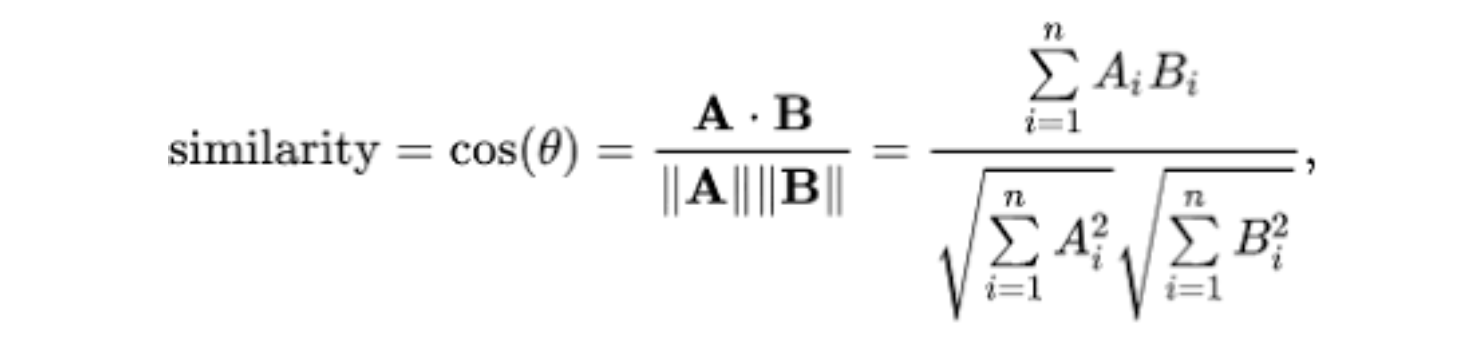

In [ ]:
# Define additional features for content-based recommendation
features = ['cast', 'keywords', 'genres', 'director', 'writer', 'producer', 'production_companies', 'production_countries']
top_num = 5
# Preprocess the additional features
for feature in features:
    df[feature] = df[feature].apply(lambda x: x[:top_num] if isinstance(x, list) else [])

# Clean the data
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    elif isinstance(x, str):
        return str.lower(x.replace(" ", ""))
    else:
        return ''

for feature in features:
    df[feature] = df[feature].apply(clean_data)


# Create a single joined feature
def create_joined_features(x):
    return ' '.join([' '.join(x[f]) if isinstance(x[f], list) else str(x[f]) for f in features])

df["join_features"] = df.apply(create_joined_features, axis=1)

# Create a new count-based similarity matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['join_features'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

def get_recommendations_advanced(title, cosine_sim=cosine_sim2, top_n=5):
    idx = indices[title]  # Get the index of the movie that matches the title
    sim_scores = list(enumerate(cosine_sim[idx]))  # Get the pairwise similarity scores of all movies with that movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort the movies based on the similarity scores
    sim_scores = sim_scores[1:top_n+1]  # Get the top N most similar movies

    # Get the movie indices and their corresponding titles and similarity rates
    movie_indices = [i[0] for i in sim_scores]  # Get the movie indices
    movie_titles = df.iloc[movie_indices]['original_title'].tolist()  # Get the movie titles
    similarity_rates = [i[1] for i in sim_scores]  # Get the similarity rates

    # Return a list of tuples containing movie titles and their similarity rates
    return list(zip(movie_titles, similarity_rates))



In [ ]:
get_recommendations_advanced('Superman', cosine_sim2)

[('Superman II', 0.7368421052631575),
 ('Superman IV: The Quest for Peace', 0.5740378478819278),
 ('Superman III', 0.5506887917539347),
 ('Superman Returns', 0.45056355688958294),
 ('Man of Steel', 0.45056355688958294)]

In [ ]:
get_recommendations_advanced('Man of Steel', cosine_sim2)

[('Batman v Superman: Dawn of Justice', 0.5582905262390825),
 ('Superman II', 0.5506887917539347),
 ('Superman Returns', 0.5238095238095238),
 ('Superman', 0.45056355688958294),
 ('Superman III', 0.4285714285714286)]